![Logo.png](Images/Logo.png)


Tutorial Group: 	T01 Group 4 <br>

Student Name 1:	Ryan Liam Poon Yang<br>
Student Number: 	S10222131E <br>
Student Name 2:	Teh Zhi Xian<br>
Student Number: 	S10221851J<br>
Student Name 3:	Chuah Kai Yi<br>
Student Number: 	S10219179E<br>
Student Name 4:	Don Sukkram<br>
Student Number: 	S10223354J<br>
Student Name 5:	Darryl Koh<br>
Student Number: 	S10221893J<br>



#### 1. [Setup](#0) 
   - [1.1 Import Packages](#1.1)  
   - [1.2 Connect to Snowflake](#1.2) 
   - [1.3 Gathering Data as Snowpark DataFrame](#1.3)

#### 2. [Data Exploration](#1)
   - [2.0.1 Model Value Towards Tasty Byte KPI](#2.01)
   - [2.1 K-Means Clustering](#2.1)  
      - [2.1.1 Joining the Data](#2.1.1)  
         - [2.1.1.1 Define function - Remove Duplicate Columns from Joins](#2.1.1.1)  
         - [2.1.1.2 Join Members Data with Orders_V](#2.1.1.2)  
      - [2.1.2 Generate RFN table (K-Means Specific)](#2.1.2)  
      - [2.1.3 Outlier Handling (K-Means Specific)](#2.1.3)  
      - [2.1.4 Feature Scaling (K-Means Specific)](#2.1.4)  
      - [2.1.5 Building K-Means model](#2.1.5)  
      - [2.1.6 Improving the K-Means model](#2.1.6)  
   - [2.2 Visualise the Data](#2.2) 
      - [2.2.1 K-Means Clusters](#2.2.1) 
      - [2.2.2 Total number of Transactions](#2.2.2) 
      - [2.2.3 Members in Country](#2.2.3) 
      - [2.2.4 Total number of Transactions](#2.2.4) 
   - [2.3 Churn Rate by Country](#2.3) 
      - [2.3.2 Calculate Churn Rate by Country](#2.3.2)
      - [2.3.3 Visualise Churn Rate](#2.3.0)

#### 3. [Data Engineering](#3)
   - [3.1 Generate new Columns](#3.1)  
      - [3.1.1 Get Latest Order Date](#3.1.1)
      - [3.1.2 RFM (Recency, Freqency, Monetary)](#3.1.2)
      - [3.1.3 Average Time Difference, Max and Min Days without Purchase](#3.1.3)
      - [3.1.4 Creating Age and getting Customer's Gender, Marital Status and Country](#3.1.4)
      - [3.1.5 Join Generated Variables](#3.1.5)
      - [3.1.6 Days to Next Order](#3.1.6)
      - [3.1.7 Filter to selected Country](#3.1.7)
   - [3.2 Outlier Handling](#3.2)  
      - [3.2.1 Identify Numericals](#3.2.1)
      - [3.2.2 Visualise Outliers](#3.2.2)
      - [3.2.3 Cap the Outliers](#3.2.3)
         - [3.2.3.1 Cap by IQR](#3.2.3.1)
         - [3.2.3.2 Cap by Gaussian](#3.2.3.2)
   - [3.3 Numerical Transformation](#3.3)
      - [3.3.1 Visualise Numericals](#3.3.1)
      - [3.3.2 YeoJohnson Transformer](#3.3.2)
   - [3.4 Generate Target Variable](#3.4)
   - [3.5 Sample the Data](#3.5)
      - [3.5.1 Stratified Sampling](#3.5.1)

#### 4. [Split the Data](#3)
   - [4.1 Data Engineering 2](#4.1)  
      - [4.1.1 Categorical Encoding](#4.1.1)
         - [4.1.1.1 One Hot Encoding](#4.1.1.1)
         - [4.1.1.2 Clean the Encoded Columns](#4.1.1.2)
      - [4.1.2 Feature Scaling](#4.1.2)
         - [4.1.2.1 Min Max Scaler](#4.1.2.1)
      - [4.1.3 Drop Target Variable](#4.1.3)  

#### 5. [Model Building](#5) 
   - [5.1 Define Evaluation Function](#5.1)  
   - [5.2 Logistic Regression](#5.2)
      - [5.2.1 Build the model](#5.2.1)
      - [5.2.2 Improve the model](#5.2.2)
   - [5.3 Decision Tree](#5.3)
      - [5.3.1 Build the model](#5.3.1)
      - [5.3.2 Improve the model](#5.3.2)
   - [5.4 Random Forest](#5.4)
      - [5.4.1 Build the model](#5.4.1)
      - [5.4.2 Improve the model](#5.4.2)
   - [5.5 Adaboost](#5.5)
      - [5.5.1 Build the model](#5.5.1)
      - [5.5.2 Improve the model](#5.5.2)
   - [5.6 XGboost (Final Model)](#5.6)
      - [5.6.1 Build the model](#5.6.1)
      - [5.6.2 Improve the model](#5.6.2)
   
#### 6. [Model Comparison](#6)
   - [6.1 Model Accuracies](#6.1)  

#### 7. [Machine-Learning with Snowflake ](#7) 
   - [7.1 Create the Stage ](#7.1)  
   - [7.2 Create Tables](#7.2)  
   - [7.3 Create Final Model ](#7.3) 
   - [7.4 Model Training](#7.4)
   - [7.5 Model Deployment](#7.5)
      - [7.5.1 Create a User-Defined Function for Model Inference](#7.5.1) 
      - [7.5.2 Run UDF](#7.5.2) 
         - [7.5.2.1 Evaluation](#7.5.2.1)


# Overview
We are part of the data team at Snowflake. Snowflake is a provider of cloud-based data platform based in Singapore that offers scalable, cloud-based data processing, analytics and machine learning services that can integrate with a wide range of other tools enabling users to build and deploy models for predictive analytics and AI applications. 

The customer is Tasty Bytes, one of the largest food truck networks in the world with localized menu options spread across 30 major cities in 15 countries. In the inception deck, we have identified the following pain points: 

●   Member Churn is quite high, at ~33% of all members churned over a 3 year period<br>
●   Member Churn is at ~50% in a 1 month period<br>
●   Membership sign up growth is stagnant with no upward trend<br>

This means that Tasty Bytes has a unsustainable churn rate and may result in market shrinkage in the future. Moreover, their long term goals are as follows:

![tasty_byte_goals.jpg](assets/tasty_byte_goals.jpg)

For our Proof of Concept (POC), we will be focusing on the Sales and NPS metrics in particular

![tasty_byte_goals_focus.jpg](assets/tasty_byte_goals_focus.jpg)

To help Tasty Bytes address their pain points and reach their goals, we have come up with a solution, which will be to create a user-friendly customer analytics platform that provides key insights on member behavior to improve retention and drive growth. 

To accomplish this, the following steps will be taken

●   Create an unsupervised learning model to segment our members<br>
●   Create a Churn Prediction Model to identify members who are at risk of ending their relationship with the company<br>
●   Integrate the Machine-Learning model and key visualizations into streamlit web application<br>

In this juypter notebook, we will be creating an unsupervised learning model to segment Tasty Byte's members and a classification model to predict member's churn

# 1. Setup

## 1.1 Import Packages

In [2]:
#Import Python packages
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import json
import datetime
import numpy as np
from matplotlib.gridspec import GridSpec
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# for splitting of the dataset
from sklearn.model_selection import train_test_split

# for encoding/transforming the data
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import RareLabelEncoder
from feature_engine.outliers import Winsorizer
from feature_engine.transformation import YeoJohnsonTransformer
from sklearn.preprocessing import MinMaxScaler

#ML-Models: Classification
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn. ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import AdaBoostClassifier

#Building clustering model
from sklearn.cluster import KMeans 

# for getting metrics
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score,silhouette_samples

# model selection
from sklearn.model_selection import GridSearchCV

# Import Snowflake modules
from snowflake.snowpark import Session
import snowflake.snowpark.functions as F
import snowflake.snowpark.types as T
from snowflake.snowpark import Window
# Define a simple scoring function
from cachetools import cached

## 1.2 Connect to Snowflake

In [3]:
# Get account credentials from a json file
with open("data_scientist_auth.json") as f:
    data = json.load(f)
    username = data["username"]
    password = data["password"]
    account = data["account"]

# Specify connection parameters
connection_parameters = {
    "account": account,
    "user": username,
    "password": password,
    "role": "TASTY_BI",
    "warehouse": "TASTY_BI_WH",
    "database": "frostbyte_tasty_bytes",
    "schema": "analytics",
}

# Create Snowpark session
session = Session.builder.configs(connection_parameters).create()

In [4]:
session.sql("ALTER WAREHOUSE TASTY_BI_WH SET WAREHOUSE_SIZE = MEDIUM").collect()

[Row(status='Statement executed successfully.')]

## 1.3 Gathering Data as Snowpark DataFrame

In [5]:
# Orders_V
# contains orders, trucks, shift information
tasty_bytes_orders_v = session.table("frostbyte_tasty_bytes.analytics.orders_v")
# Customer Loyalty
# contains information on signed up members
tasty_bytes_customer_loyalty = session.table("frostbyte_tasty_bytes.raw_customer.customer_loyalty")

locations= session.table("frostbyte_tasty_bytes.raw_pos.location")

menu= session.table("frostbyte_tasty_bytes.raw_pos.menu")
#Sentiment_Survey_ds
# contains NPS score
SENTIMENT_DATA = session.table("ngee_ann_polytechnic_frostbyte_data_share.raw_survey.sentiment_survey_ds")
# Truck information data
TRUCK_DATA = session.table("NGEE_ANN_POLYTECHNIC_FROSTBYTE_DATA_SHARE.raw_pos.truck")
# Comparison Data
NPS_COMPARE = session.table("NPS_COMPARE")

# 2. Data Exploration 

## 2.0 Model Value Towards Tasty Byte KPI

### 2.0.1 Define function - Remove Duplicate Columns from Joins

In [6]:
#Function to remove and rename columns after inner join
def remove_dup_join_col(df):
    # capitalise all columns
    for col in df.columns:
        df = df.withColumnRenamed(col, col.upper())
    
    # get list of renamable columns for left and right join
    left_dup_col = [col_name for col_name in df.columns if col_name.startswith('L_')]
    right_dup_col = [col_name for col_name in df.columns if col_name.startswith('R_')]
    old_columns = df.columns
    
    # rename the list with the most number of renamable columns
    # drop the list of columns with less number of renamable columns
    if len(left_dup_col)>len(right_dup_col):
        columns_rename=left_dup_col
        df= df.drop(*right_dup_col)
    else:
        columns_rename=right_dup_col
        df= df.drop(*left_dup_col)
    
    for old_column in old_columns:
        if old_column in columns_rename:
            # get string to remove
            string_to_replace = columns_rename[0][:7]
            # replace starting string
            new_column = old_column.replace(string_to_replace, "")
            df = df.withColumnRenamed(old_column, new_column)
    
    return df

## 2.2 Visualise the Data

### 2.2.2 Members in Country

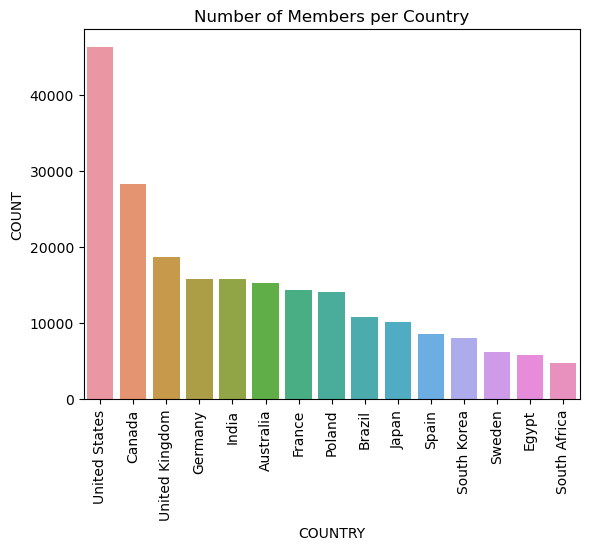

In [7]:
# Unique members
unique_Members=tasty_bytes_customer_loyalty.group_by(F.col('Country')).count().to_pandas().sort_values(by='COUNT',ascending=False)
sns.barplot(x='COUNTRY',y='COUNT',data=unique_Members)
plt.xticks(rotation=90)
plt.title('Number of Members per Country')
plt.show()

It can be seen that the Unite States has the most number of members of all the countries Tasty Bytes serves. By choosing the United States, we will have the largest possible sample size of members to most closely mimic a global dataset.

### 2.2.3 Total number of Transactions

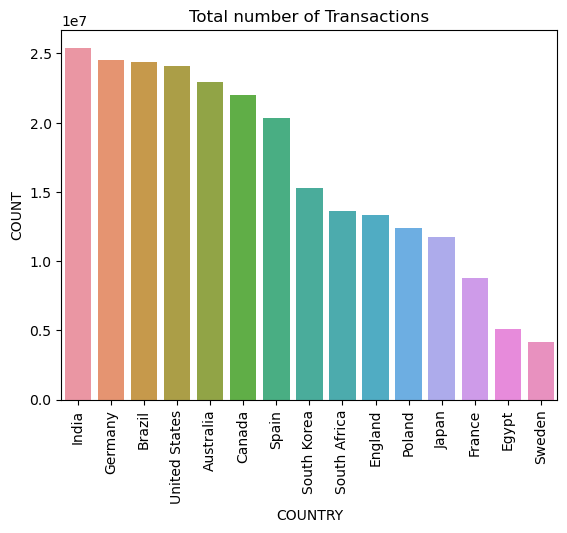

In [8]:
# Number of unique transactions
unique_Transactions=tasty_bytes_orders_v.group_by(F.col('COUNTRY')).agg(F.countDistinct('ORDER_ID').alias('COUNT')).to_pandas().sort_values(by='COUNT',ascending=False)
sns.barplot(x='COUNTRY',y='COUNT',data=unique_Transactions)
plt.xticks(rotation=90)
plt.title('Total number of Transactions')
plt.show()

It can be seen that the United States has the 4th most number of transactions. We are able to get a balance of the number of members with sufficent data on each member from their orders

## 2.3 Churn Rate by Country

### 2.3.1 Get Churn Cut Off date by Country

In [9]:
#Get last transaction date for each country
last_tran_country = tasty_bytes_orders_v.group_by(F.col('COUNTRY')).max(F.to_date(F.col('ORDER_TS'))).to_pandas()

#Get assumed churned date which is two weeks before last transaction date, then get total number of customers in the assumed time period
last_tran_country['CHURN_DATE']=last_tran_country['MAX(TO_DATE(ORDER_TS))']-datetime.timedelta(days=14)
last_tran_country['CUSTOMER_COUNT_DATE']=last_tran_country['MAX(TO_DATE(ORDER_TS))']-datetime.timedelta(days=44)

#Make pandas dataframe into a snowpark dataframe
last_tran_country_sdf=session.createDataFrame(last_tran_country)

#Merge 
last_tran_country_sdf_join = last_tran_country_sdf.join(
    right=tasty_bytes_orders_v,
    on="COUNTRY",
    how="inner"
)

We get the churn cut off date by country. This is done by subtracting 14 days from the latest order date, with 14 days being the assumed churn period. These values are compared with the time stamp so that we can identify which customers were active within the time frame and how many left. 

### 2.3.2 Calculate Churn Rate by Country

In [10]:
#Filter dataframe to the assumed time period
df = last_tran_country_sdf_join[last_tran_country_sdf_join["DATE"] > last_tran_country_sdf_join["CUSTOMER_COUNT_DATE"]]

#Filter to get churned members dataset
df2 = df[last_tran_country_sdf_join["DATE"] > last_tran_country_sdf_join["CHURN_DATE"]]

#Number of customers before churn date
cust_bef = df.groupBy("COUNTRY").agg(F.countDistinct(F.col("CUSTOMER_ID")).alias('COUNT_BEF'))
#Number of customers after churn date
cust_aft = df2.groupBy("COUNTRY").agg(F.countDistinct(F.col("CUSTOMER_ID")).alias('COUNT_AFT'))

#Merge
calculator = cust_aft.join(
    right=cust_bef,
    on="COUNTRY",
    how="inner"
)
calc = calculator.to_pandas()

#Calculate Churn rate 
calc["CHURN_RATE"] = (((calc["COUNT_BEF"] - calc["COUNT_AFT"]) / calc["COUNT_BEF"]) * 100)
churn_Rate=calc.sort_values(by='CHURN_RATE',ascending=False)

We calculated the churn rate for each country. This is done by calculating the number of customers at the start and end of churn period. After doing so, the churn rate is grouped by the different countries.

### 2.3.3 Visualise Churn Rate

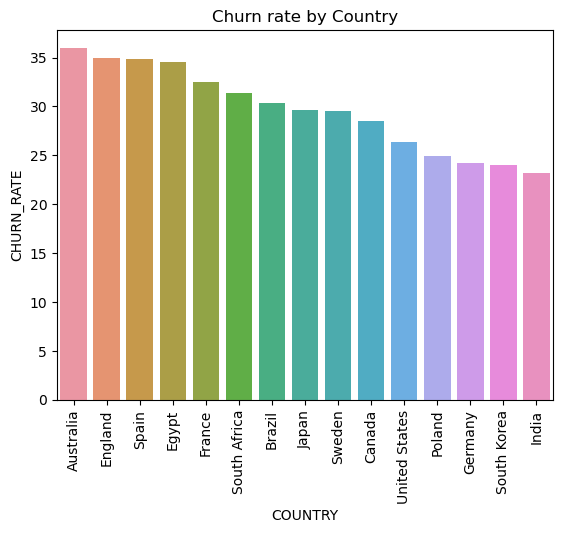

In [11]:
#Churn rate by Country
sns.barplot(x='COUNTRY',y='CHURN_RATE',data=churn_Rate)
plt.xticks(rotation=90)
plt.title('Churn rate by Country')
plt.show()

<b>We decided to work on United States as it has the most number of customers, a high number of customers and quite a high Churn Rate.

# 3. Data Engineering

## 3.1 Generate new Columns

In [12]:
#Merge to get loyal customers orders
loyal_customer_orders=tasty_bytes_orders_v.join(
    right=tasty_bytes_customer_loyalty,
    on="CUSTOMER_ID",
    how="inner"
)

In [13]:
#Remove duplicate columns
loyal_customer_orders = remove_dup_join_col(loyal_customer_orders)

#Remove duplicate order ids
remove_dup = loyal_customer_orders.dropDuplicates(['ORDER_ID'])

### 3.1.1 Get Latest Order Date

In [14]:
# called `orders` with columns `customer_id` and `order_ts`
window_spec = Window.partitionBy('customer_id').orderBy(F.col('order_ts').desc())

orders_with_rank = remove_dup.withColumn('rank', F.rank().over(window_spec))

# Get max order of each customer
max_order_ts = orders_with_rank.filter(F.col('rank') == 1).select('customer_id', 'order_ts')


In [15]:
# Rename columns
max_order_ts = max_order_ts.withColumnRenamed('ORDER_TS','Max_Order_TS')

In [16]:
# Merge with second max order dataframe
max_Order=remove_dup.join(right=max_order_ts,on='CUSTOMER_ID',how='inner')

#Filter out last purchase
filtered_df = max_Order.filter(F.col('ORDER_TS') < F.col('Max_Order_TS'))


In [17]:
# Display last recorded purchase globally
filtered_df.select(F.max('ORDER_TS')).show()

-----------------------
|"MAX(""ORDER_TS"")"  |
-----------------------
|2022-10-31 22:54:37  |
-----------------------



We got the latest order date to filter out the last purchase and its also used to get the days to next order. Since our target variable is closely related to the days to next order, we filter out the last purchase to not leak future information such that we are able to prevent target leakage.

### 3.1.2 RFM (Recency, Freqency, Monetary)

In [18]:
# Get last purchase date as a variable
lastdate=filtered_df.select(F.max('ORDER_TS')).first()[0]

# Recency
recency = filtered_df.groupBy('CUSTOMER_ID').agg(F.max('ORDER_TS').alias('ORDER_TS'))
recency = recency.withColumn('RECENCY', F.datediff(col1=F.col('ORDER_TS'), col2=F.lit(lastdate),part='day'))

# Frequency
frequency = filtered_df.groupBy('CUSTOMER_ID').agg(F.countDistinct('ORDER_ID').alias('frequency'))

# Monetary
monetary = filtered_df.groupBy('CUSTOMER_ID').agg(F.sum('ORDER_TOTAL').alias('monetary'))

# Merge into RFM table
RFM_table = recency.join(frequency, on='CUSTOMER_ID', how='inner')
RFM_table = RFM_table.join(monetary, on='CUSTOMER_ID', how='inner')


This code is used to get RFM, Recency, Frequency, and Monetary for each customer. The purpose of doing this is to generate new features and show the customer's behavioural data.

### 3.1.3 Average Time Difference, Max and Min Days without Purchase

In [19]:
# Define a window partitioned by customer and menu item, ordered by date
window_spec = Window.partitionBy("CUSTOMER_ID").orderBy("DATE")

# Add a column with the date of the prior order for each customer 
orders_df = filtered_df.withColumn("DAYS_SINCE_PRIOR_ORDER", F.lag("DATE").over(window_spec))

# Calculate the number of days between the prior order and the current order for each customer and menu item
orders_df = orders_df.withColumn("DAYS_SINCE_PRIOR_ORDER", F.datediff(col1="DAYS_SINCE_PRIOR_ORDER", col2="DATE",part='day'))
orders_df = orders_df.na.drop(subset=["DAYS_SINCE_PRIOR_ORDER"])

# Calculate the average purchase time difference for each customer
avg_time_diff=orders_df.group_by('CUSTOMER_ID').agg(F.round(F.avg('DAYS_SINCE_PRIOR_ORDER'),0).alias('Avg_Days_Between_Purchase'))

# Max Days without Purchase
max_days=orders_df.group_by('CUSTOMER_ID').agg(F.max('DAYS_SINCE_PRIOR_ORDER').alias('Max_Days_Without_Purchase'))

# Min Days without Purchase
min_days=orders_df.group_by('CUSTOMER_ID').agg(F.min('DAYS_SINCE_PRIOR_ORDER').alias('Min_Days_Without_Purchase'))

This code is used to get the average purchase time difference for each customers. This is done by calculating the most number of days a customer has gone without purchasing and the least number of days the customer has gone without purchasing. These features are also to show the behavioural information of each customer.

### 3.1.4 Creating Age and getting Customer's Gender, Marital Status and Country

In [20]:
# Get Customer demographic
cust_demo=tasty_bytes_customer_loyalty.select('CUSTOMER_ID','BIRTHDAY_DATE','GENDER','MARITAL_STATUS','COUNTRY','CITY','SIGN_UP_DATE','CHILDREN_COUNT')

# get AGE variable
cust_demo = cust_demo.withColumn("AGE", F.datediff('year', F.col("BIRTHDAY_DATE"),F.lit(lastdate)))

# Show
cust_demo.show()

---------------------------------------------------------------------------------------------------------------------------------------------
|"CUSTOMER_ID"  |"BIRTHDAY_DATE"  |"GENDER"     |"MARITAL_STATUS"  |"COUNTRY"  |"CITY"          |"SIGN_UP_DATE"  |"CHILDREN_COUNT"  |"AGE"  |
---------------------------------------------------------------------------------------------------------------------------------------------
|1              |1953-12-01       |Female       |Single            |Germany    |Hamburg         |2019-02-19      |0                 |69     |
|2              |1973-09-21       |Male         |Single            |Brazil     |Rio de Janeiro  |2019-10-07      |0                 |49     |
|3              |2000-09-04       |Female       |Married           |Poland     |Krakow          |2020-09-11      |2                 |22     |
|4              |1950-03-05       |Female       |Single            |Poland     |Krakow          |2021-09-09      |1                 |72     |
|5    

We added a new column called "AGE" which contains the age of the customer at the time of the latest transaction. We also retrieved new columns like the customer's gender, marital status and country.

### Attempted Improvements to the model

#### Improved the Model

In [21]:
# Number of locations visited
num_of_locations_visited=filtered_df.group_by('CUSTOMER_ID').agg(F.countDistinct('LOCATION_ID').alias('NUM_OF_LOCATIONS_VISITED'))

In [22]:
# Add Length of relationship

window_spec = Window.partitionBy('customer_id').orderBy(F.col('order_ts').asc())

orders_with_rank = filtered_df.withColumn('rank', F.rank().over(window_spec))

# Get max order of each customer
first_order_ts = orders_with_rank.filter(F.col('rank') == 1).select('customer_id', 'order_ts')

# Join the first_orders and last_orders DataFrames on customer_id
joined_orders = first_order_ts.join(max_order_ts, 'customer_id')

# Calculate the difference in days between the first and last order
diff_in_days = joined_orders.withColumn('Length_of_Relationship', F.datediff(col1='order_ts', col2='max_order_ts',part='day'))

diff_in_days=diff_in_days.drop(['ORDER_TS','MAX_ORDER_TS'])

diff_in_days.show()

--------------------------------------------
|"CUSTOMER_ID"  |"LENGTH_OF_RELATIONSHIP"  |
--------------------------------------------
|15181          |1213                      |
|197848         |1001                      |
|67043          |934                       |
|71446          |1345                      |
|62068          |1183                      |
|133794         |918                       |
|139454         |1336                      |
|5381           |1302                      |
|131212         |978                       |
|127608         |933                       |
--------------------------------------------



In [48]:
avg_Sales=filtered_df.group_by('CUSTOMER_ID').agg(F.mean(F.col('ORDER_TOTAL')))
std_Sales=filtered_df.group_by('CUSTOMER_ID').agg(F.stddev((F.col('ORDER_TOTAL'))))

### 3.1.5 Join Generated Variables

In [78]:
# Merge to get final dataframe
final_df = RFM_table.join(max_order_ts, on='CUSTOMER_ID', how='inner')
final_df = final_df.join(avg_time_diff, on='CUSTOMER_ID', how='inner')
final_df = final_df.join(max_days, on='CUSTOMER_ID', how='inner')
final_df = final_df.join(min_days, on='CUSTOMER_ID', how='inner')
final_df = final_df.join(cust_demo,on='CUSTOMER_ID',how='inner')
final_df = final_df.join(diff_in_days,on='CUSTOMER_ID',how='inner')
final_df = final_df.join(num_of_locations_visited,on='CUSTOMER_ID',how='inner')
final_df = final_df.join(avg_Sales,on='CUSTOMER_ID',how='inner')
final_df = final_df.join(std_Sales,on='CUSTOMER_ID',how='inner')


We joined all the different tables to get all the columns in the same table by inner joining all the different tables on the CUSTOMER_ID column. The joined table contains all the different features we will be using to predict the target.

#### Attempted Improvement: Created Relative Purchase Frequency and Monetary

In [79]:
final_df=final_df.with_column('RELATIVE_PURCHASE_FREQUENCY',(F.col('FREQUENCY')/F.col('Length_of_Relationship')).cast('float'))
final_df=final_df.with_column('RELATIVE_PURCHASE_MONETARY',(F.col('MONETARY')/F.col('Length_of_Relationship')).cast('float'))

### 3.1.6 Days to Next Order

In [80]:
# Convert timestamp to date such that Days to next orders is more accurate
final_df=final_df.with_column('ORDER_TS',F.to_date(F.col('ORDER_TS')))
final_df=final_df.with_column('MAX_ORDER_TS',F.to_date(F.col('MAX_ORDER_TS')))

In [53]:
# Add Days To Next Order
final_df = final_df.withColumn('Days_To_Next_Order', F.datediff(col1=final_df['ORDER_TS'], col2=final_df['MAX_ORDER_TS'],part='day'))

We use the median number of days since the prior order for the global dataset to create a target variable that distinguishes customers who purchase below or above this median. Customers who purchase below the median will be labeled as 'Not churn', while those who purchase above the median will be labeled as 'Churn'. This approach will help us identify customers who may require retention strategies and predict their level of engagement with our business.

The median days to next order is 9 for customers from all countries, this will be used to check if our train dataset's target variable is representative of the global dataset.

### 3.1.7 Filter to selected Country

In [54]:
# Filter to United States
final_df=final_df.filter(F.col('COUNTRY')=='United States')

We filtered the data to only have records for the United States. This is because we are only interested in the United States as shown above due to its high churn rate and high number of customers

In [55]:
# Sort CustomerID
final_df=final_df.sort('CUSTOMER_ID')

In [56]:
# Convert to pandas
final_df=final_df.to_pandas()

We converted the table to pandas because we want to carry out data manipulation.

## 3.2 Outlier Handling

### 3.2.1 Identify Numericals

In [57]:
num_cols=final_df.select_dtypes(exclude=['object','datetime64[ns]']).columns

### 3.2.2 Visualise Outliers

In [58]:
# Function to explore the distributuion of variables
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    fig=plt.figure(figsize=(12, 4))
    fig.suptitle(variable)
    
    # histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30,kde=True)
    plt.title('Histogram')

    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

In [59]:
# function to create before and after histogram
def before_after_histogram(df_before,df_after, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_before[variable], bins=30)
    plt.title('Before')

    # histogram
    plt.subplot(1, 2, 2)
    sns.histplot(df_after[variable], bins=30)
    plt.title('After')

    plt.suptitle(variable)

    plt.show()

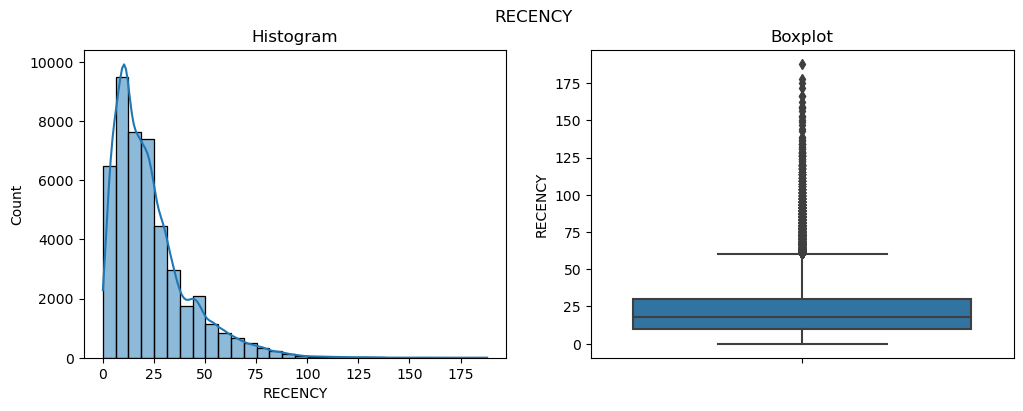

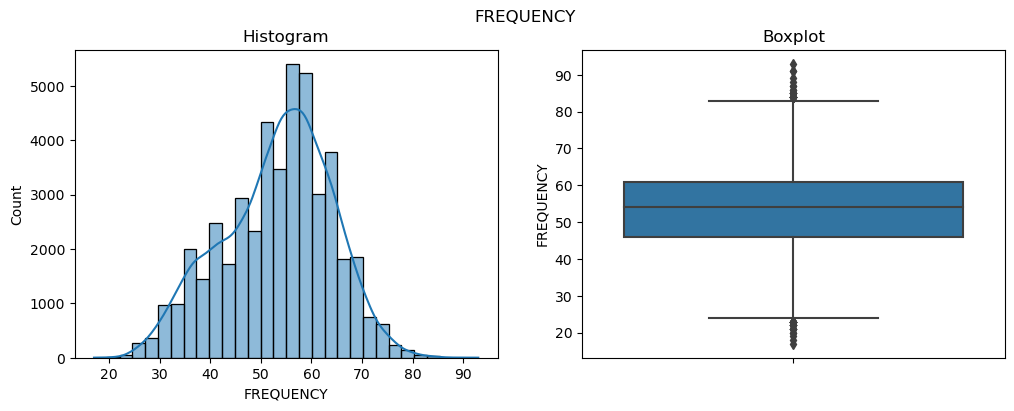

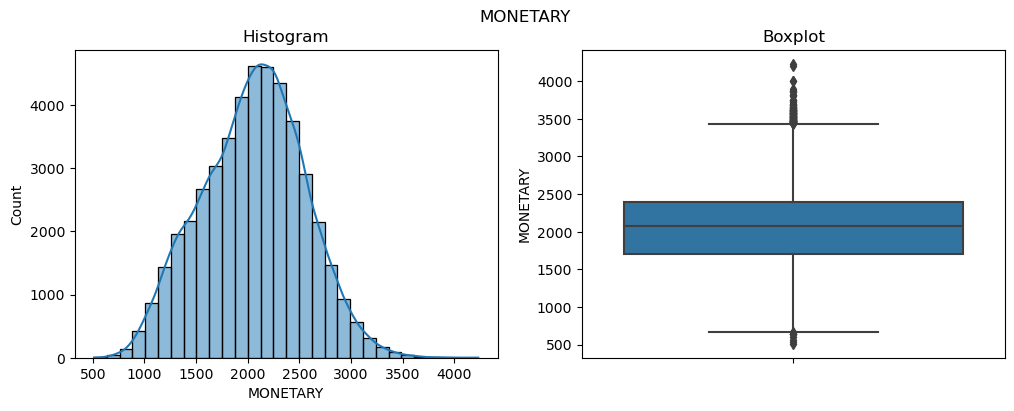

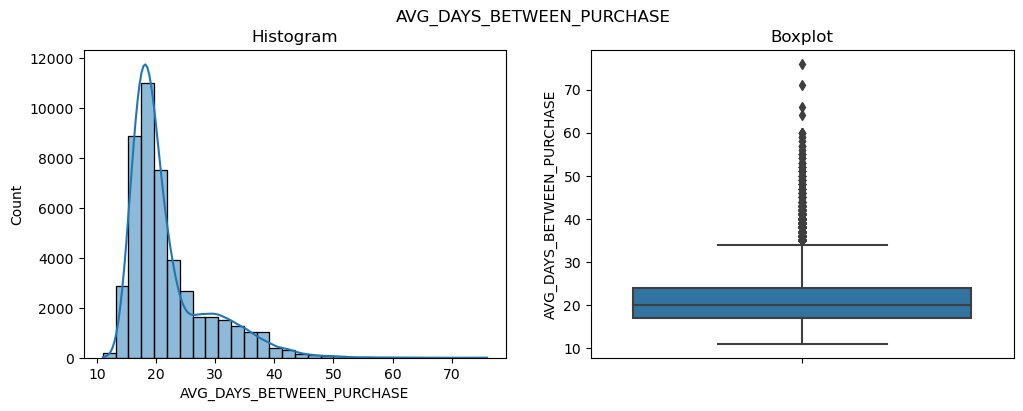

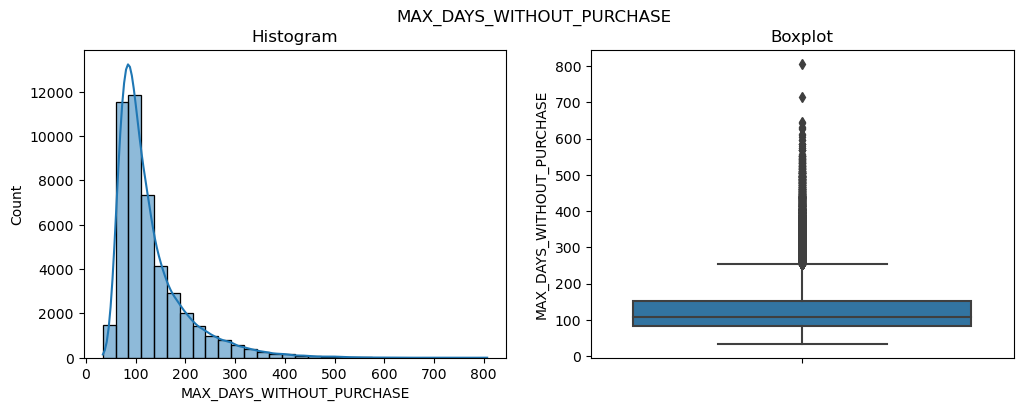

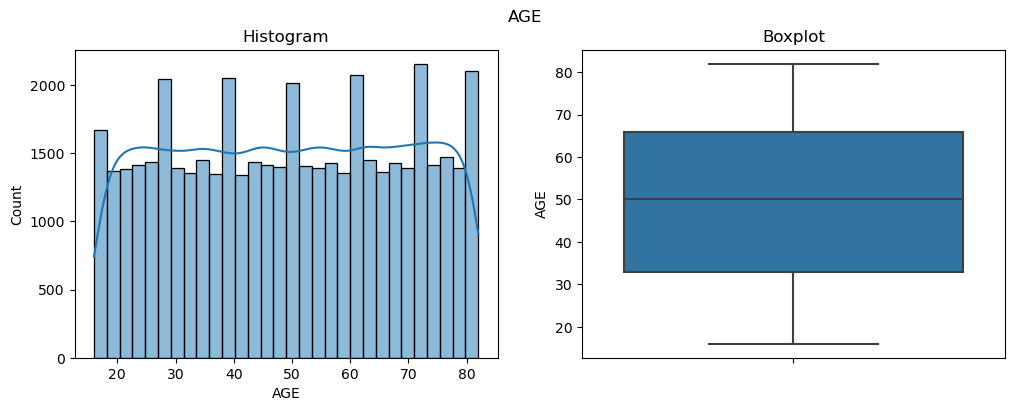

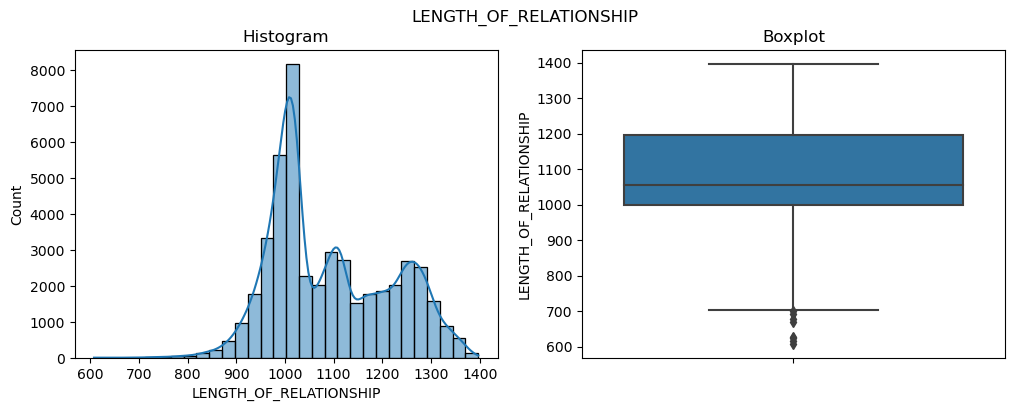

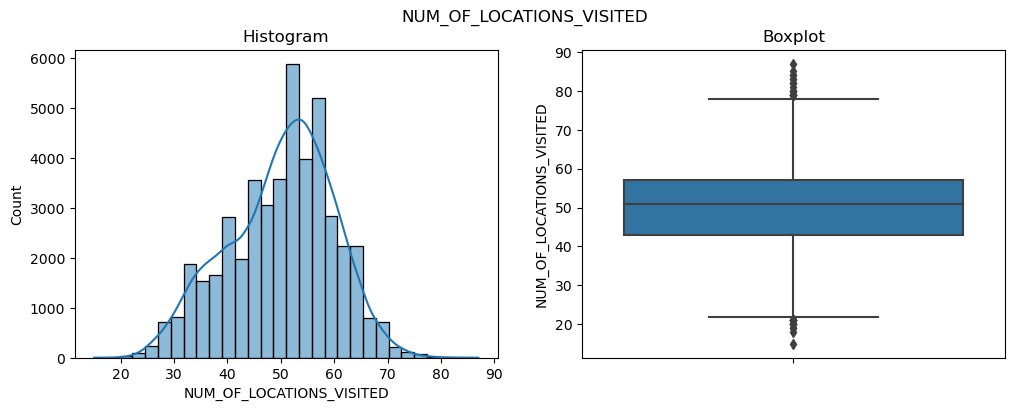

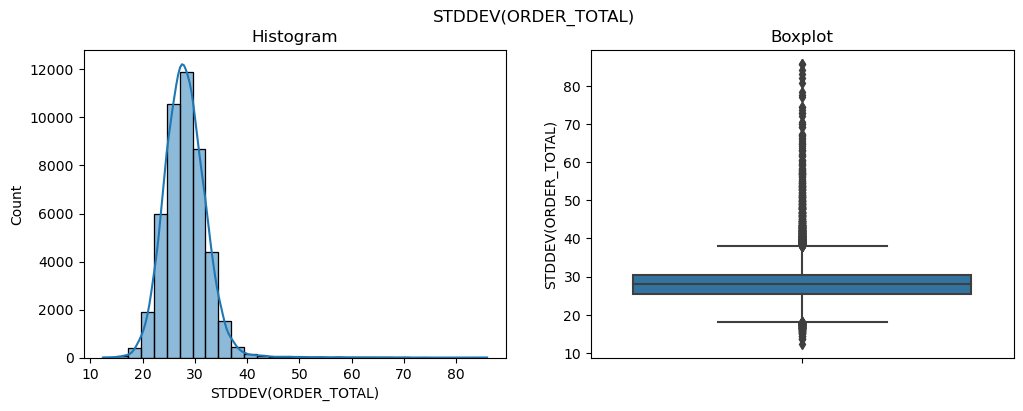

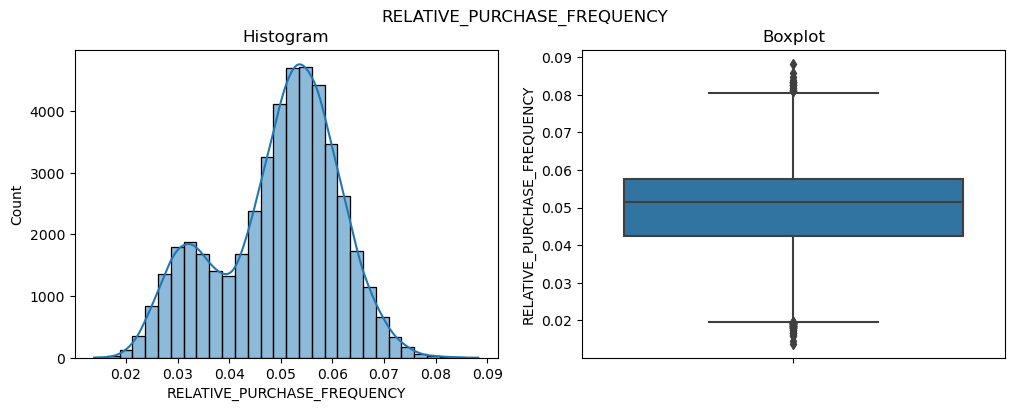

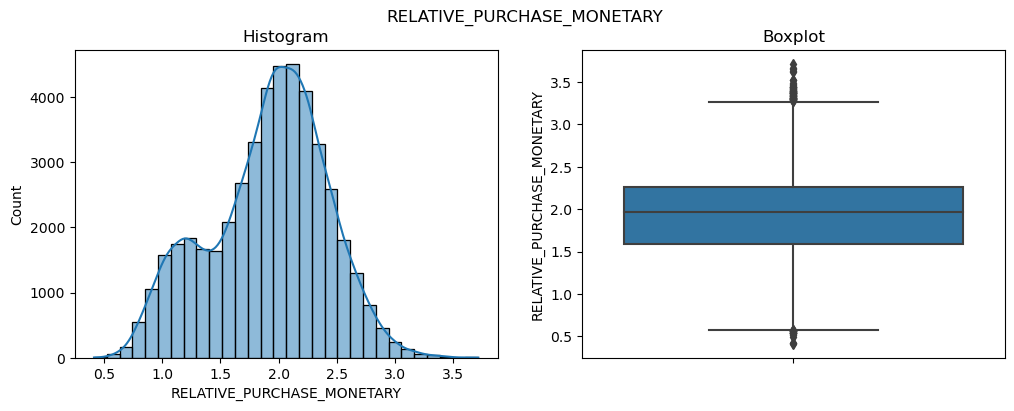

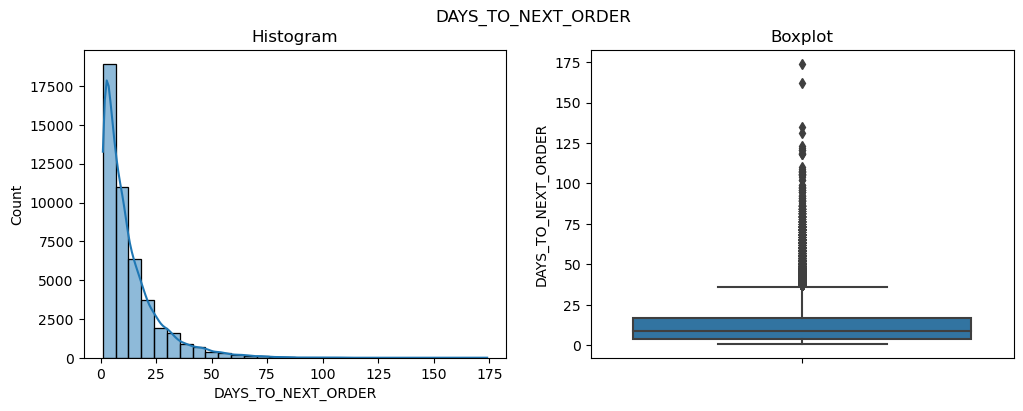

In [60]:
for i in num_cols.drop(['MIN_DAYS_WITHOUT_PURCHASE','CUSTOMER_ID']):
    diagnostic_plots(final_df,i)
    plt.show()

From the histograms, it can be seen that Recency, Average days between purchase, Maximum days without purchase and days to next order columns have a right skewed distribution. 

Frequency and Monetary have quite a normal distribution.

*Note there is no point dealing with outliers in Days to next order as even when dealt with, the 50% mark stays the same, meaning no change to our target variable.

### 3.2.3 Cap the Outliers

#### 3.2.3.1 Cap by IQR

In [61]:
# create the capper
windsorizer = Winsorizer(capping_method='iqr', # choose iqr for skewed or gaussian for normal
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=['RECENCY','AVG_DAYS_BETWEEN_PURCHASE','MAX_DAYS_WITHOUT_PURCHASE'])

windsorizer.fit(final_df)


Winsorizer(capping_method='iqr', tail='both',
           variables=['RECENCY', 'AVG_DAYS_BETWEEN_PURCHASE',
                      'MAX_DAYS_WITHOUT_PURCHASE'])

In [62]:
final_df_win = windsorizer.transform(final_df)

Cap by IQR for distributions with high skewness. (Outliers = 75th percentile onwards)

#### 3.2.3.2 Cap by Gaussian

In [63]:
# create the capper
windsorizer = Winsorizer(capping_method='gaussian', # choose iqr for skewed or gaussian for normal
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=['FREQUENCY','MONETARY'])

windsorizer.fit(final_df_win)

Winsorizer(tail='both', variables=['FREQUENCY', 'MONETARY'])

In [64]:
final_df_win = windsorizer.transform(final_df_win)

Cap by gaussian for distributions with a normal ditribution. (Outliers = 3 Standard-deviations away)

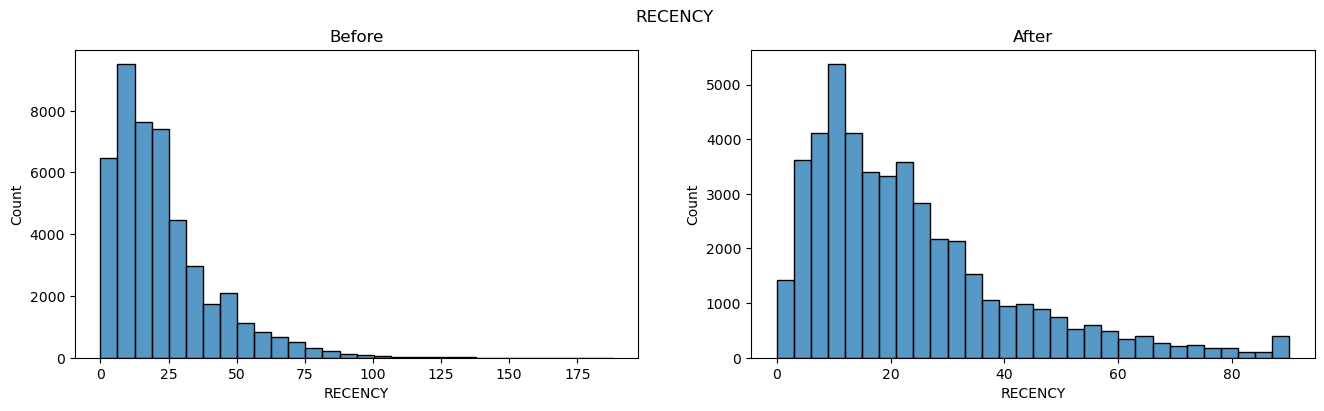

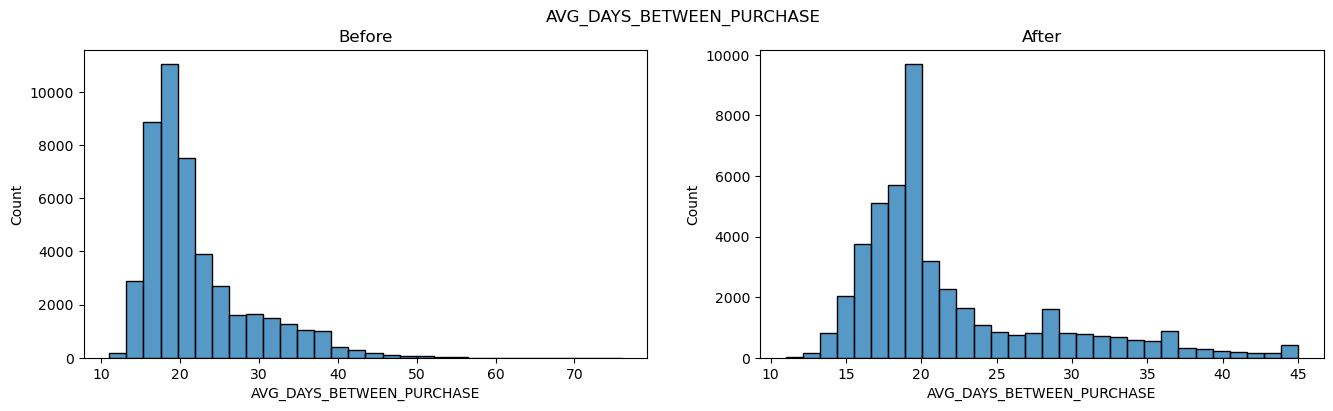

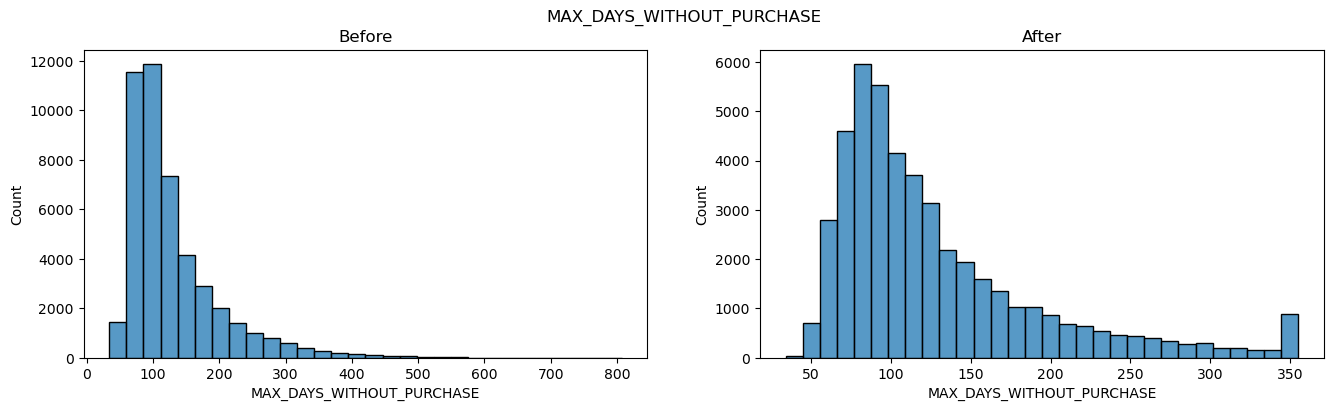

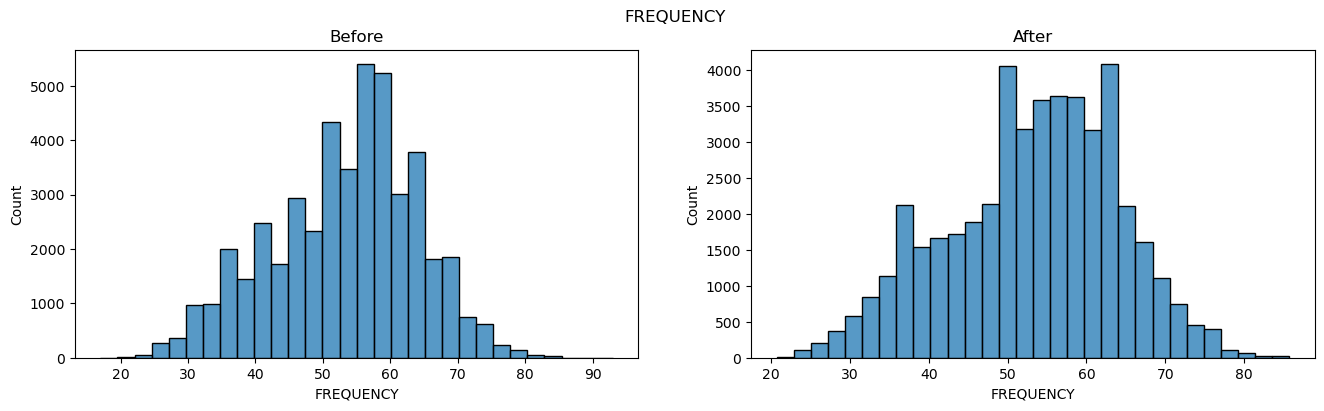

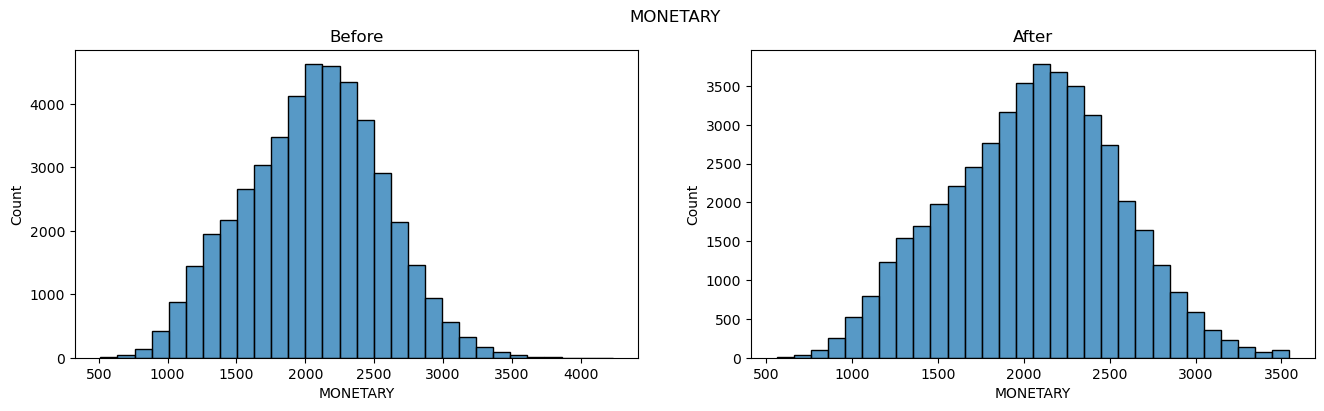

In [65]:
capped_cols = ['RECENCY','AVG_DAYS_BETWEEN_PURCHASE','MAX_DAYS_WITHOUT_PURCHASE','FREQUENCY','MONETARY']

for col in capped_cols:
        before_after_histogram(final_df,final_df_win,col)

It can be seen that much of the outliers have been 'Capped' where all values above a certain threshold are placed at the uppermost limit. This ensures that the machine learning model will not be trained for anomalies and outliers but for the majority of members

We see that AVG_DAYS_BETWEEN_PURCHASE and MAX_DAYS_WITHOUT_PURCHASE has had a significant amount of outlier handling done, where the maximum values for both have been halved, down from 70 to 45 and 800 to 350 respectively.

By reducing the variable range, it helps the model focus on the key patterns and relationships within the majority of the data.

## 3.3 Numerical Transformation

### 3.3.1 Visualise Numericals

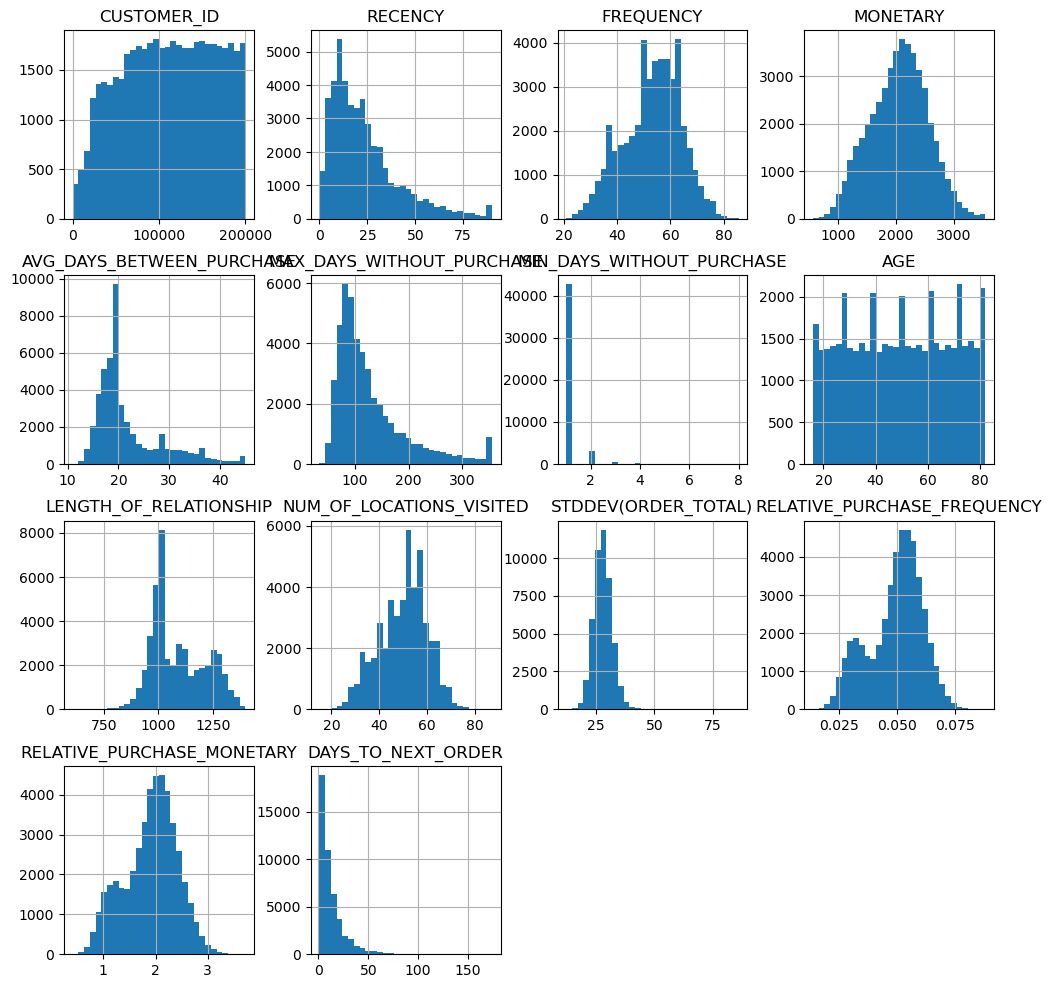

In [66]:
# plot the histogram to inspect variable distributions (not in book)

final_df_win.hist(bins=30, figsize=(12,12))
plt.show()

### 3.3.2 YeoJohnson Transformer

In [67]:
# create untransformed copy of the dataframe for customer segmentation
cust_seg_ori = final_df_win.copy()

# Add Target CHURNED
cust_seg_ori['CHURNED'] = 1
cust_seg_ori.loc[cust_seg_ori['DAYS_TO_NEXT_ORDER']<=14,'CHURNED'] = 0

In [68]:
# select variables to transform in a list
cols = ['RECENCY', 'AVG_DAYS_BETWEEN_PURCHASE', 'MAX_DAYS_WITHOUT_PURCHASE']

# initialize the transformer with a subset of variables to transform
yjt = YeoJohnsonTransformer(variables = cols)

# fit transformer to the dataframe
yjt.fit(final_df_win)

YeoJohnsonTransformer(variables=['RECENCY', 'AVG_DAYS_BETWEEN_PURCHASE',
                                 'MAX_DAYS_WITHOUT_PURCHASE'])

In [69]:
# transform indicated variables
final_df_yjt = yjt.transform(final_df_win)

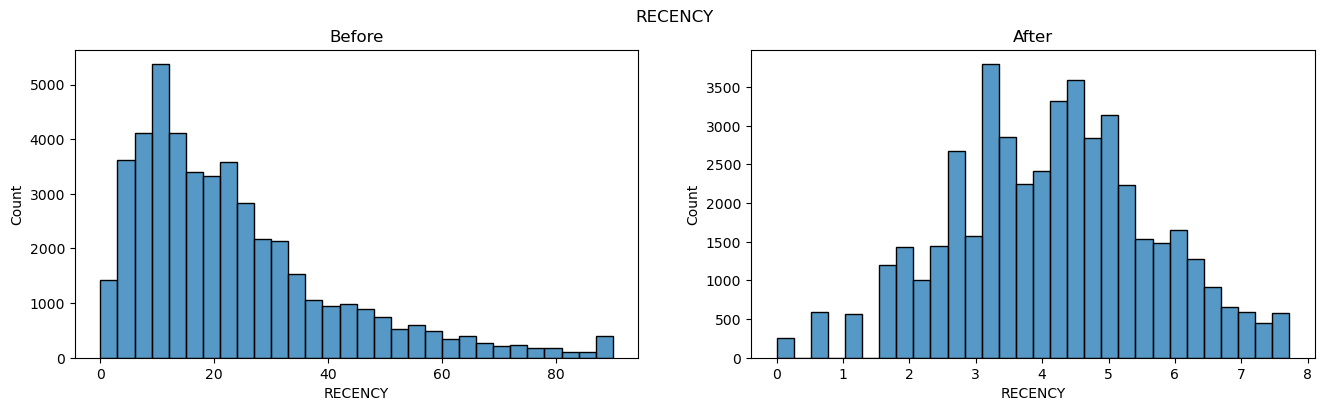

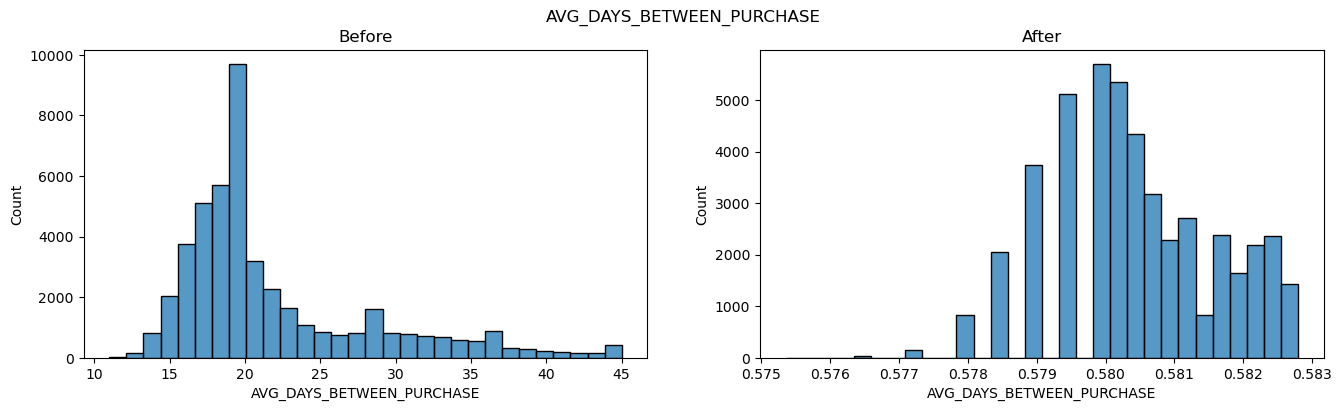

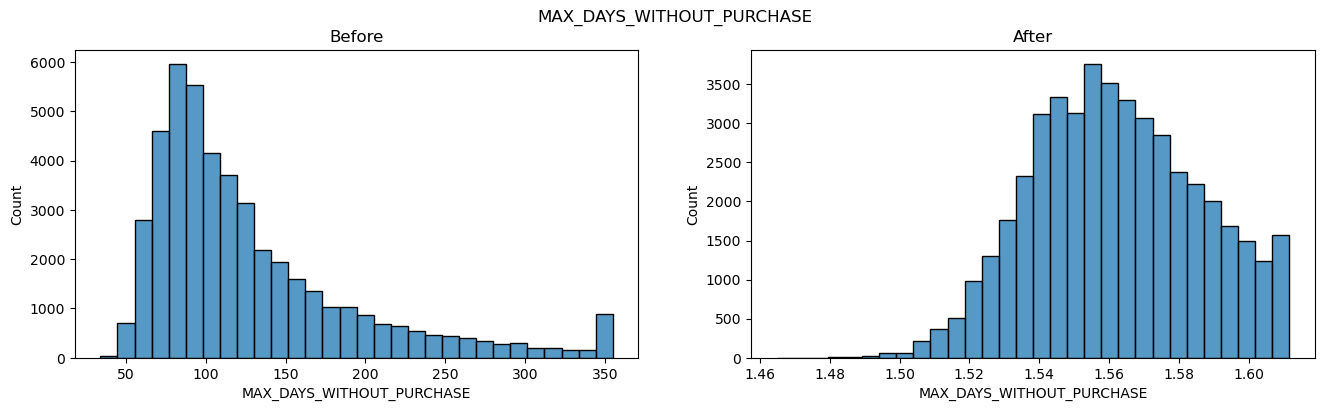

In [70]:
capped_cols = ['RECENCY', 'AVG_DAYS_BETWEEN_PURCHASE', 'MAX_DAYS_WITHOUT_PURCHASE']

for col in capped_cols:
        before_after_histogram(final_df_win,final_df_yjt,col)

It can be seen that the 3 variables to be transformed have achieved a more normal distribution. This ensures that the model avoids overfitting to the random noise of the data by reducing the variable range further, as well as further mitigates the effects of outliers.

## 3.4 Generate CHURN

In [76]:
train=final_df_yjt.drop(['BIRTHDAY_DATE','GENDER','MARITAL_STATUS','COUNTRY','CITY','SIGN_UP_DATE','CHILDREN_COUNT','DAYS_TO_NEXT_ORDER','ORDER_TS','MAX_ORDER_TS'],axis=1,errors='ignore')

In [ ]:
train['']

In [77]:
max_Order.filter(F.col('ORDER_TS')==F.col('Max_Order_TS'))

,CUSTOMER_ID,RECENCY,FREQUENCY,MONETARY,AVG_DAYS_BETWEEN_PURCHASE,MAX_DAYS_WITHOUT_PURCHASE,MIN_DAYS_WITHOUT_PURCHASE,AGE,LENGTH_OF_RELATIONSHIP,NUM_OF_LOCATIONS_VISITED,AVG(ORDER_TOTAL),STDDEV(ORDER_TOTAL),RELATIVE_PURCHASE_FREQUENCY,RELATIVE_PURCHASE_MONETARY,CHURNED
0,22,3.703338,43.0,1404.50,0.581995,1.585555,1,73,1253,40,32.6627906977,22.055860,0.034318,1.120910,0
1,42,2.826122,39.0,1811.50,0.582233,1.583971,1,56,1270,36,46.4487179487,34.642924,0.030709,1.426378,0
2,59,4.842724,38.0,1256.50,0.582233,1.611530,1,61,1260,35,33.0657894737,20.879698,0.030159,0.997222,1
3,65,5.063010,42.0,1393.25,0.581995,1.593114,2,64,1222,40,33.1726190476,25.259174,0.034370,1.140139,0
4,106,4.143910,48.0,2096.75,0.581271,1.581417,1,55,1133,47,43.6822916667,36.289606,0.042365,1.850618,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46295,199985,4.242576,66.0,2576.50,0.579072,1.511298,1,78,1028,60,39.0378787879,33.541944,0.064202,2.506323,0
46296,199991,1.931614,57.0,2185.50,0.579861,1.560874,1,64,1034,54,38.3421052632,29.056312,0.055126,2.113636,0
46297,199995,6.646942,36.0,1297.75,0.581271,1.569639,1,78,903,34,36.0486111111,26.698771,0.039867,1.437154,1
46298,199999,5.200493,36.0,1210.50,0.582081,1.587774,1,50,1102,35,33.6250000000,23.936934,0.032668,1.098457,1


In [73]:
sdad

NameError: name 'sdad' is not defined

## 3.5 Sample the Data

### 3.5.1 Stratified Sampling

In [ ]:
df1=final_df_yjt[final_df_yjt['CHURNED']==1]
len(df1)

13976

In [ ]:
df0=final_df_yjt[final_df_yjt['CHURNED']==0]
len(df0)

32324

In [ ]:
# Perform Stratified Sampling
df0_sampled = df0.sample(n=len(df1), random_state=4).copy()
df_new=pd.concat([df1,df0_sampled],axis=0)
df_new['CHURNED'].value_counts()

1    13976
0    13976
Name: CHURNED, dtype: int64

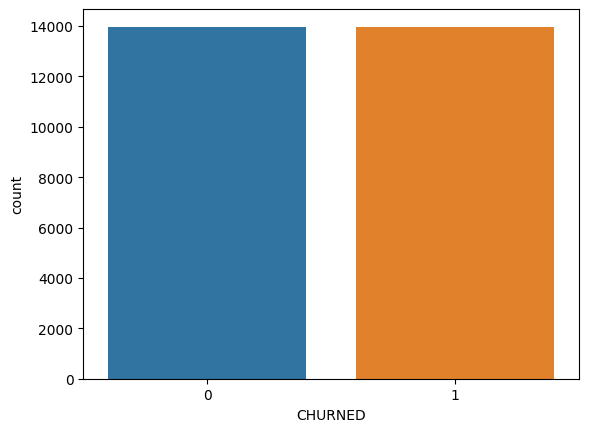

In [ ]:
# Distribution of target variable
sns.countplot(data=df_new,x='CHURNED')
plt.show()

# 4 Split the Data

In [ ]:
# Train test split
X = df_new.drop(['CUSTOMER_ID','DAYS_TO_NEXT_ORDER','MAX_ORDER_TS','ORDER_TS','COUNTRY','BIRTHDAY_DATE','SIGN_UP_DATE'], axis =1,
                  errors='ignore')
y = df_new["CHURNED"]


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.6,random_state=42)

In [ ]:
# Test and holdout split
X_test,X_holdout,y_test,y_holdout=train_test_split(X_test,y_test,test_size=0.5,random_state=42)

## 4.1 Data Engineering 2

Data engineering needs to be done in 2 parts, one before and one after splitting the data so as to prevent data leakage to the test datasets

### 4.1.1 Categorical Encoding

#### 4.1.1.1 One Hot Encoding

In [ ]:
# One Hot Encoding 
ohe_enc = OneHotEncoder(
     top_categories=None,
     drop_last=True,
     variables=['GENDER','MARITAL_STATUS','CITY','CHILDREN_COUNT']) 

ohe_enc.fit(X_train)
X_train = ohe_enc.transform(X_train)
X_test=ohe_enc.transform(X_test)
X_holdout=ohe_enc.transform(X_holdout)

#### 4.1.1.2 Clean the Encoded Columns

In [ ]:
X_train.rename({'MARITAL_STATUS_Divorced/Seperated':'MARITAL_STATUS_Divorced_Or_Seperated'}, axis=1,inplace=True)
X_test.rename({'MARITAL_STATUS_Divorced/Seperated':'MARITAL_STATUS_Divorced_Or_Seperated'}, axis=1,inplace=True)
X_holdout.rename({'MARITAL_STATUS_Divorced/Seperated':'MARITAL_STATUS_Divorced_Or_Seperated'}, axis=1,inplace=True)

In [ ]:
X_train.columns = map(str.upper, X_train.columns)
X_test.columns = map(str.upper, X_test.columns)
X_holdout.columns = map(str.upper, X_holdout.columns)

### 4.1.2 Feature Scaling

#### 4.1.2.1 Min Max Scaler

In [ ]:
# Min Max Scaler

cols_to_scale=X_train.drop('CHURNED',axis=1, errors='ignore').columns

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train[cols_to_scale])

# transform train and test sets
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test[cols_to_scale]= scaler.transform(X_test[cols_to_scale])
X_holdout[cols_to_scale]=scaler.transform(X_holdout[cols_to_scale])

In [ ]:
# Save tables to snowflake
#session.create_dataframe(X_train).write.save_as_table(table_name="train_table", mode='overwrite')
#session.create_dataframe(X_test).write.save_as_table(table_name="test_table", mode='overwrite')
#session.create_dataframe(X_holdout).write.save_as_table(table_name="holdout_table", mode='overwrite')

### 4.1.3 Drop Target Variable

In [ ]:
X_train=X_train.drop('CHURNED',axis=1, errors='ignore')
X_test=X_test.drop('CHURNED',axis=1, errors='ignore')
X_holdout=X_holdout.drop('CHURNED',axis=1, errors='ignore')

# K-Means

In [ ]:
# function to create change in silhoutte score and change against number of clusters
def silhouette_score_eval(sil_scores,ylim=None,suptitle=None):
    
    differences = [sil_scores[i+1] - sil_scores[i] for i in range(len(sil_scores)-1)]

    # define figure size
    plt.figure(figsize=(16, 4))

    # regular
    plt.subplot(1, 2, 1)
    plt.plot(range(2, 11), sil_scores, 'b-*')
    plt.title('Actual Silhouette Score')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    # if ylim is not None:
    #     plt.ylim(0,ylim)
        
    # point labels
    for x, y in zip(range(2, 11), sil_scores):
         plt.text(x, y + 0.01, f'{y:.2f}', ha='center', va='bottom')

    # difference
    plt.subplot(1, 2, 2)
    plt.plot(range(2, 10), differences, 'b-*')
    plt.title('Change in Silhouette Score')
    plt.xlabel('Number of clusters')
    plt.ylabel('Change in Silhouette Score')

    if suptitle is not None:
        plt.suptitle(suptitle)
    else:
        plt.suptitle('Silhouette Score')

    plt.show()

In [ ]:
# function to create change in silhoutte score and change against number of clusters
def sse_eval(sse):
    
    percentage_change = [(sse[i+1] - sse[i]) / sse[i] * 100 for i in range(len(sse)-1)]

    # define figure size
    plt.figure(figsize=(16, 4))

    # regular
    plt.subplot(1, 2, 1)
    plt.plot(range(1, 11), sse, 'b-*')
    plt.title('Actual SSE')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')

    # difference
    plt.subplot(1, 2, 2)
    plt.plot(range(1, 10), percentage_change, 'b-*')
    plt.title('% change in SSE')
    plt.xlabel('Number of clusters')
    plt.ylabel('% Change')

    plt.suptitle('Sum of Squared Errors')

    plt.show()

In [ ]:
# displays the distribution of all variables in boxplots
def variable_boxplot(cluster_method, custom_palette,df):
    # get the number of unique clusters
    num_clusters = df[cluster_method].nunique()

    # determine the grid layout dimensions based on the number of variables and clusters
    num_variables = len(df.columns)
    grid_width = 3
    grid_height = (num_variables + grid_width - 1) // grid_width

    # calculate the figure size based on the desired boxplot size
    fig_width = 5 * grid_width
    fig_height = 4 * grid_height

    # create a new figure and GridSpec layout
    fig = plt.figure(figsize=(fig_width, fig_height))
    gs = GridSpec(grid_height, grid_width)

    # iterate over each variable
    for col_index, col in enumerate(df):
        # create lists to store boxplot data and cluster names
        boxplots = []
        clustername = []

        # iterate over each cluster
        for cluster_index in range(num_clusters):
            boxplots.append(df.iloc[:, col_index][df[cluster_method] == cluster_index].tolist())
            clustername.append('cluster ' + str(cluster_index))

        # determine the subplot position in the GridSpec layout
        ax = fig.add_subplot(gs[col_index // grid_width, col_index % grid_width])

        # create the boxplot 
        bp = ax.boxplot(boxplots, labels=clustername, patch_artist=True)

        # set custom colors for the boxplots
        for patch, color in zip(bp['boxes'], custom_palette):
            patch.set_facecolor(color)
            
        # set bright pink color for the median line
        for median in bp['medians']:
            median.set(color='limegreen')

        ax.set_ylabel(col)
        
    # show the plot
    plt.show()


In [ ]:
def variable_scatterplot(cluster_method,variable_x,custom_palette,df_num):
    # convert custom palette into a colormap
    colormap = mcolors.ListedColormap(custom_palette)

    # determine the grid layout dimensions based on the number of variables and clusters
    num_variables = len(df_num.columns) - 1  # exclude variable_x variable
    grid_width = 3
    grid_height = (num_variables + grid_width - 1) // grid_width

    # calculate the figure size based on the desired scatterplot size
    fig_width = 5 * grid_width
    fig_height = 4 * grid_height

    # create a new figure and GridSpec layout
    fig = plt.figure(figsize=(fig_width, fig_height))
    gs = GridSpec(grid_height, grid_width)

    # iterate over each variable (excluding variable_x)
    for col_index, col in enumerate(df_num.columns):
        if col != variable_x:  # exclude variable_x from subplots
            # determine the subplot position in the GridSpec layout
            subplot_index = col_index
            ax = fig.add_subplot(gs[subplot_index // grid_width, subplot_index % grid_width])

            # plot scatterplot of 'PRICE' against the variable
            ax.scatter(df_num[variable_x], df_num[col], c=df_num[cluster_method], cmap=colormap)
            ax.set_xlabel(variable_x)
            ax.set_ylabel(col)
        
    # show the plot
    plt.show()

In [ ]:
# plots a vertical bar graph of value counts by category, lengend of cluster number
def plot_categorical_distribution(categorical_variable, cluster_variable,custom_palette,df_categoical):
    plt.figure(figsize=(14, 6))
    ax = sns.countplot(data=df_categoical, x=categorical_variable, hue=cluster_variable, palette=custom_palette)
    plt.title(f"Distribution of {categorical_variable} by Clusters")
    plt.xlabel(categorical_variable)
    plt.ylabel("Count")
    plt.legend(title=cluster_variable, loc="upper right")    
    # data labels
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    plt.show()

In [ ]:
cust_seg_before_scaling = cust_seg_ori.copy()

In [ ]:
cust_seg_before_scaling['CHILDREN_COUNT'].unique()

array(['4', '0', '2', '5+', '1', 'Undisclosed', '3'], dtype=object)

In [ ]:
cust_seg_before_scaling.rename({'MARITAL_STATUS_Divorced/Seperated':'MARITAL_STATUS_Divorced_Or_Seperated'}, axis=1,inplace=True)

In [ ]:
cust_seg_before_scaling.columns

Index(['CUSTOMER_ID', 'RECENCY', 'FREQUENCY', 'MONETARY',
       'AVG_DAYS_BETWEEN_PURCHASE', 'MAX_DAYS_WITHOUT_PURCHASE',
       'MIN_DAYS_WITHOUT_PURCHASE', 'BIRTHDAY_DATE', 'GENDER',
       'MARITAL_STATUS', 'COUNTRY', 'CITY', 'SIGN_UP_DATE', 'CHILDREN_COUNT',
       'AGE', 'LENGTH_OF_RELATIONSHIP', 'NUM_OF_LOCATIONS_VISITED',
       'RELATIVE_PURCHASE_FREQUENCY', 'RELATIVE_PURCHASE_MONETARY', 'ORDER_TS',
       'MAX_ORDER_TS', 'DAYS_TO_NEXT_ORDER', 'CHURNED'],
      dtype='object')

In [ ]:
cust_seg_before_scaling.dtypes

CUSTOMER_ID                      int32
RECENCY                          int32
FREQUENCY                      float64
MONETARY                       float64
AVG_DAYS_BETWEEN_PURCHASE         int8
MAX_DAYS_WITHOUT_PURCHASE        int32
MIN_DAYS_WITHOUT_PURCHASE        int32
BIRTHDAY_DATE                   object
GENDER                          object
MARITAL_STATUS                  object
COUNTRY                         object
CITY                            object
SIGN_UP_DATE                    object
CHILDREN_COUNT                  object
AGE                              int32
LENGTH_OF_RELATIONSHIP           int32
NUM_OF_LOCATIONS_VISITED         int64
RELATIVE_PURCHASE_FREQUENCY    float64
RELATIVE_PURCHASE_MONETARY     float64
ORDER_TS                        object
MAX_ORDER_TS                    object
DAYS_TO_NEXT_ORDER               int32
CHURNED                          int64
dtype: object

In [ ]:
cust_seg_before_scaling.select_dtypes(include=[int,float]).columns

Index(['CUSTOMER_ID', 'RECENCY', 'FREQUENCY', 'MONETARY',
       'MAX_DAYS_WITHOUT_PURCHASE', 'MIN_DAYS_WITHOUT_PURCHASE', 'AGE',
       'LENGTH_OF_RELATIONSHIP', 'NUM_OF_LOCATIONS_VISITED',
       'RELATIVE_PURCHASE_FREQUENCY', 'RELATIVE_PURCHASE_MONETARY',
       'DAYS_TO_NEXT_ORDER', 'CHURNED'],
      dtype='object')

In [ ]:
cust_seg_before_scaling_cat = cust_seg_before_scaling.drop(columns=['BIRTHDAY_DATE','SIGN_UP_DATE',
                                                                    'ORDER_TS','MAX_ORDER_TS','CUSTOMER_ID', 
                                                                    'RECENCY', 'FREQUENCY', 'MONETARY',
                                                                    #'MAX_DAYS_WITHOUT_PURCHASE',
                                                                    'RELATIVE_PURCHASE_FREQUENCY', 
                                                                    'RELATIVE_PURCHASE_MONETARY',
                                                                    'DAYS_TO_NEXT_ORDER',
                                                                    #'AGE','LENGTH_OF_RELATIONSHIP',
                                                                    'NUM_OF_LOCATIONS_VISITED'])
cust_seg_before_scaling_cat

,AVG_DAYS_BETWEEN_PURCHASE,MAX_DAYS_WITHOUT_PURCHASE,MIN_DAYS_WITHOUT_PURCHASE,GENDER,MARITAL_STATUS,COUNTRY,CITY,CHILDREN_COUNT,AGE,LENGTH_OF_RELATIONSHIP,CHURNED
0,30,173,1,Male,Married,United States,San Mateo,4,73,1253,0
1,33,167,1,Undisclosed,Single,United States,San Mateo,0,56,1270,0
2,33,355,1,Male,Married,United States,San Mateo,2,61,1260,1
3,30,207,2,Male,Divorced/Seperated,United States,San Mateo,5+,64,1222,0
4,24,158,1,Female,Single,United States,San Mateo,0,55,1133,1
...,...,...,...,...,...,...,...,...,...,...,...
46295,16,54,1,Female,Married,United States,Seattle,2,78,1028,0
46296,18,107,1,Female,Married,United States,New York City,1,64,1034,0
46297,24,125,1,Undisclosed,Single,United States,Boston,0,78,903,1
46298,31,182,1,Female,Married,United States,San Mateo,2,50,1102,1


In [ ]:
cust_seg_before_scaling_num = cust_seg_before_scaling.drop(columns=cust_seg_before_scaling.select_dtypes(include=[object]).columns)
cust_seg_before_scaling_num = cust_seg_before_scaling_num.drop(columns=['CUSTOMER_ID','CHURNED',
                                                                        'MIN_DAYS_WITHOUT_PURCHASE',
                                                                        'NUM_OF_LOCATIONS_VISITED',
                                                                        'RELATIVE_PURCHASE_FREQUENCY',
                                                                        'RELATIVE_PURCHASE_MONETARY'])

cust_seg_before_scaling_num

,RECENCY,FREQUENCY,MONETARY,AVG_DAYS_BETWEEN_PURCHASE,MAX_DAYS_WITHOUT_PURCHASE,AGE,LENGTH_OF_RELATIONSHIP,DAYS_TO_NEXT_ORDER
0,14,43.0,1404.50,30,173,73,1253,2
1,8,39.0,1811.50,33,167,56,1270,3
2,26,38.0,1256.50,33,355,61,1260,21
3,29,42.0,1393.25,30,207,64,1222,11
4,18,48.0,2096.75,24,158,55,1133,16
...,...,...,...,...,...,...,...,...
46295,19,66.0,2576.50,16,54,78,1028,11
46296,4,57.0,2185.50,18,107,64,1034,4
46297,59,36.0,1297.75,24,125,78,903,57
46298,31,36.0,1210.50,31,182,50,1102,18


In [ ]:
cust_seg_before_scaling_train = cust_seg_before_scaling[['RECENCY','FREQUENCY','MONETARY',
                                                         'AGE','LENGTH_OF_RELATIONSHIP'
                                                         ]]

cust_seg_before_scaling_train

,RECENCY,FREQUENCY,MONETARY,AGE,LENGTH_OF_RELATIONSHIP
0,14,43.0,1404.50,73,1253
1,8,39.0,1811.50,56,1270
2,26,38.0,1256.50,61,1260
3,29,42.0,1393.25,64,1222
4,18,48.0,2096.75,55,1133
...,...,...,...,...,...
46295,19,66.0,2576.50,78,1028
46296,4,57.0,2185.50,64,1034
46297,59,36.0,1297.75,78,903
46298,31,36.0,1210.50,50,1102


In [ ]:
# without AGE	LENGTH_OF_RELATIONSHIP
# # Min Max Scaler
# cols_to_scale=['RECENCY','FREQUENCY','MONETARY'#, 'AGE', #'AVG_DAYS_BETWEEN_PURCHASE','LENGTH_OF_RELATIONSHIP'
#                ]

# scaler = MinMaxScaler()

# # fit the scaler to the train set, it will learn the parameters
# scaler.fit(cust_seg_before_scaling_train[cols_to_scale])

# cust_seg_after_scaling=cust_seg_before_scaling_train[cols_to_scale].copy()
# # transform train and test sets
# cust_seg_after_scaling[cols_to_scale] = scaler.transform(cust_seg_before_scaling_train[cols_to_scale])

In [ ]:
# With AGE	LENGTH_OF_RELATIONSHIP
# Min Max Scaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(cust_seg_before_scaling_train)

cust_seg_after_scaling=cust_seg_before_scaling_train.copy()
# transform train and test sets
cust_seg_after_scaling = scaler.transform(cust_seg_before_scaling_train)

In [ ]:
# Find the optimal number of clusters (i.e. K) using elbow method
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=20, random_state=1)
    kmeans.fit(cust_seg_after_scaling)
    sse.append(kmeans.inertia_)

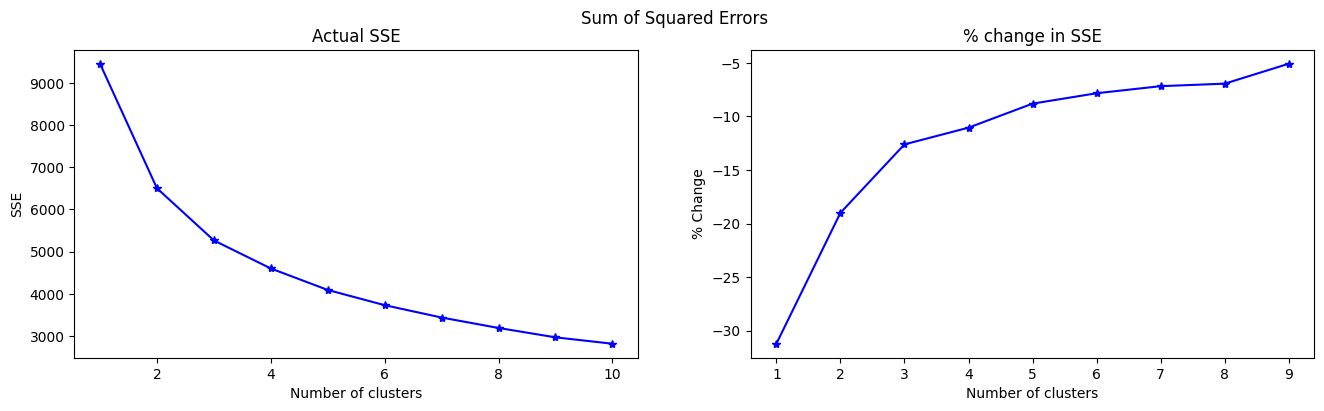

In [ ]:
sse_eval(sse)

In [ ]:
# Find the optimal number of clusters (i.e. K) using elbow method
sil_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, n_init=20, random_state=1)
    kmeans.fit(cust_seg_after_scaling)
    sil_scores.append(silhouette_score(cust_seg_after_scaling, kmeans.labels_))

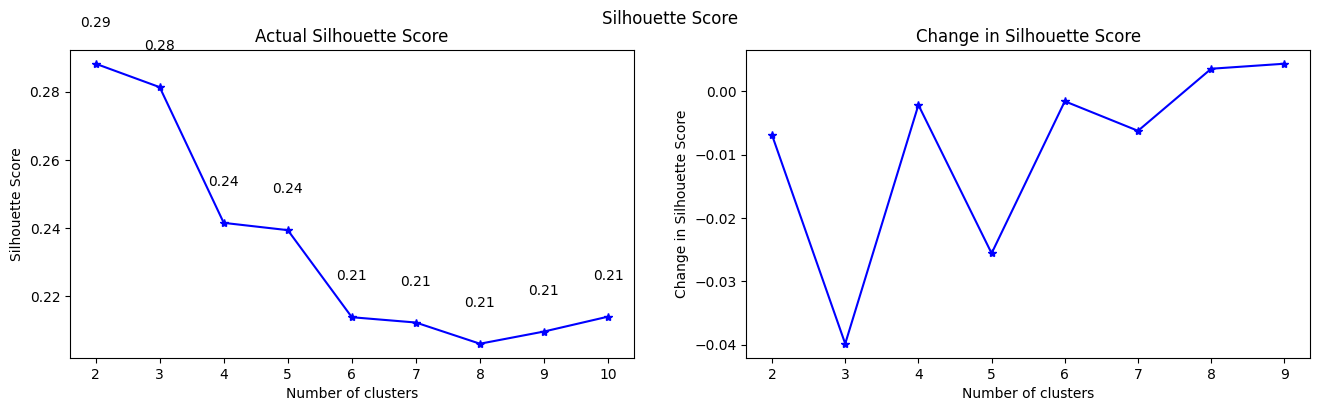

In [ ]:
silhouette_score_eval(sil_scores, ylim=1)

In [ ]:
# num of clusters
num_of_k_means_clusters = 5
# Build a K-means clustering model
kmeans = KMeans(n_clusters=num_of_k_means_clusters, n_init=20, max_iter=300, random_state=1)
# Fit the Model on our dataset
kmeans.fit(cust_seg_after_scaling)
# Assign each data object/point to the cluster represented by its nearest centroid
y_pred = kmeans.predict(cust_seg_after_scaling)

In [ ]:
# Define a custom color palette
custom_palette_k_means = sns.color_palette("tab10", n_colors=num_of_k_means_clusters)
custom_palette_k_means

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353)]

In [ ]:
# Add in cluster information into original dataframe (dat)
cust_seg_before_scaling_num['kmeans_cluster']=y_pred
cust_seg_before_scaling_cat['kmeans_cluster']=y_pred

In [ ]:
# cluster_colors = ['#b4d2b1', '#cd7e59', '#ddb247', '#d15252', '#9b59b6', '#3498db', '#f39c12']
# # Add in cluster information into original dataframe (dat)


# # Groupped Boxplots

# features = kmeans.feature_names_in_
# ncols = 3
# nrows = len(features) // ncols + (len(features) % ncols > 0)
# fig = plt.figure(figsize=(12,4))

# for n, feature in enumerate(features):
#     ax = plt.subplot(nrows, ncols, n + 1)
#     box = cust_seg_before_scaling_num[[feature, 'kmeans_cluster']].boxplot(by='kmeans_cluster',ax=ax,return_type='both',patch_artist = True)

#     for row_key, (ax,row) in box.iteritems():
#         ax.set_xlabel('cluster')
#         ax.set_title(feature,fontweight="bold")
#         for i,box in enumerate(row['boxes']):
#             box.set_facecolor(cluster_colors[i])

# fig.suptitle('Feature distributions per cluster', fontsize=18, y=1)   
# plt.tight_layout()
# plt.show()

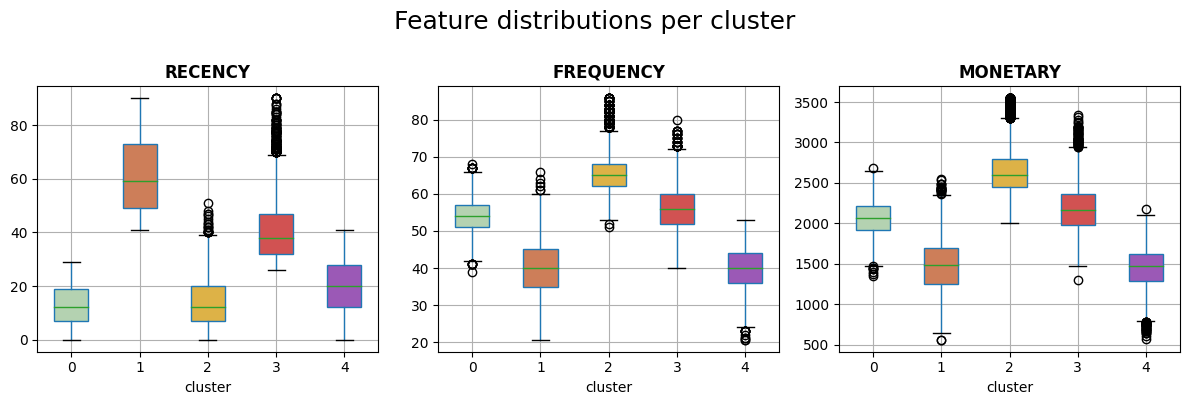

In [ ]:
# analysis_df=cust_seg_before_scaling_num[['RECENCY','FREQUENCY','MONETARY','kmeans_cluster']]

In [ ]:
# Step 1: Group the DataFrame by 'kmeans_cluster'
cluster_groups = analysis_df.groupby('kmeans_cluster')

# Step 2: Iterate through each cluster group and apply .info() function
for cluster, cluster_df in cluster_groups:
    print(f"Cluster {cluster} Description:")
    print(cluster_df.describe())
    print("------------")

Cluster 0 Description:
            RECENCY     FREQUENCY      MONETARY  kmeans_cluster
count  15177.000000  15177.000000  15177.000000         15177.0
mean      13.067668     54.285564   2062.624646             0.0
std        7.122689      4.373209    201.630990             0.0
min        0.000000     39.000000   1348.750000             0.0
25%        7.000000     51.000000   1917.750000             0.0
50%       12.000000     54.000000   2070.000000             0.0
75%       19.000000     57.000000   2214.250000             0.0
max       29.000000     68.000000   2690.000000             0.0
------------
Cluster 1 Description:
           RECENCY    FREQUENCY     MONETARY  kmeans_cluster
count  3896.000000  3896.000000  3896.000000          3896.0
mean     61.972279    39.951761  1484.978976             1.0
std      14.789746     7.405753   319.546959             0.0
min      41.000000    20.686715   562.670357             1.0
25%      49.000000    35.000000  1256.187500             1.0

**Cluster 0: "Active Moderate-Value Customers"**
- Description: This cluster represents customers who are active, show moderate recency (recent purchases), and have a moderate level of spending (moderate monetary value).

**Cluster 1: "Inactive Low-Spending Customers"**
- Description: This cluster consists of customers who exhibit high recency (longest inactivity), low spending (lowest monetary value), and have low purchase frequency (low frequency). These customers are currently inactive and have not made recent purchases.

**Cluster 2: "High-Value Loyal Customers"**
- Description: This cluster includes customers who are both high-value and highly loyal to the business. They have moderate recency (recent purchases), a high purchase frequency (high frequency), and spend significantly (high monetary value). These customers are the most valuable and loyal members, representing a critical segment for the business's ongoing success.

**Cluster 3: "Engaged Moderate-Value Customers"**
- Description: This cluster comprises customers who show moderate recency (recent purchases), a moderate purchase frequency (moderate frequency), and have a moderate level of spending (moderate monetary value). They are actively engaged with the brand and contribute to the business's success.

**Cluster 4: "Active Low-Spending Customers"**
- Description: This cluster consists of customers who have made recent purchases (moderate recency), but their spending is relatively low (low monetary value). They exhibit moderate purchase frequency (moderate frequency) and represent an active but low-spending segment.

In [ ]:
# I am testing here-Ryan Liam

In [ ]:
# range_n_clusters = [2, 3, 4, 5, 6]

# for n_clusters in range_n_clusters:
#     # Create a subplot with 1 row and 1 column (removed ax2)
#     fig, ax1 = plt.subplots(1, 1)
#     fig.set_size_inches(12, 7)

#     ax1.set_xlim([-0.1, 1])
#     ax1.set_ylim([0, len(cust_seg_after_scaling) + (n_clusters + 1) * 10])

#     clusterer = KMeans(n_clusters=n_clusters, n_init=20, max_iter=300, random_state=1)
#     cluster_labels = clusterer.fit_predict(cust_seg_after_scaling)

#     silhouette_avg = silhouette_score(cust_seg_after_scaling, cluster_labels)
#     print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

#     sample_silhouette_values = silhouette_samples(cust_seg_after_scaling, cluster_labels)

#     y_lower = 10
#     for i in range(n_clusters):
#         ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
#         ith_cluster_silhouette_values.sort()
#         size_cluster_i = ith_cluster_silhouette_values.shape[0]
#         y_upper = y_lower + size_cluster_i
#         color = cm.nipy_spectral(float(i) / n_clusters)
#         ax1.fill_betweenx(
#             np.arange(y_lower, y_upper),
#             0,
#             ith_cluster_silhouette_values,
#             facecolor=color,
#             edgecolor=color,
#             alpha=0.7,
#         )
#         ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
#         y_lower = y_upper + 10

#     ax1.set_title("The silhouette plot for the various clusters.")
#     ax1.set_xlabel("The silhouette coefficient values")
#     ax1.set_ylabel("Cluster label")
#     ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
#     ax1.set_yticks([])
#     ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#     plt.suptitle(
#         "Silhouette analysis for Hierarchical clustering on sample data with n_clusters = %d"
#         % n_clusters,
#         fontsize=14,
#         fontweight="bold",
#     )

# plt.show()

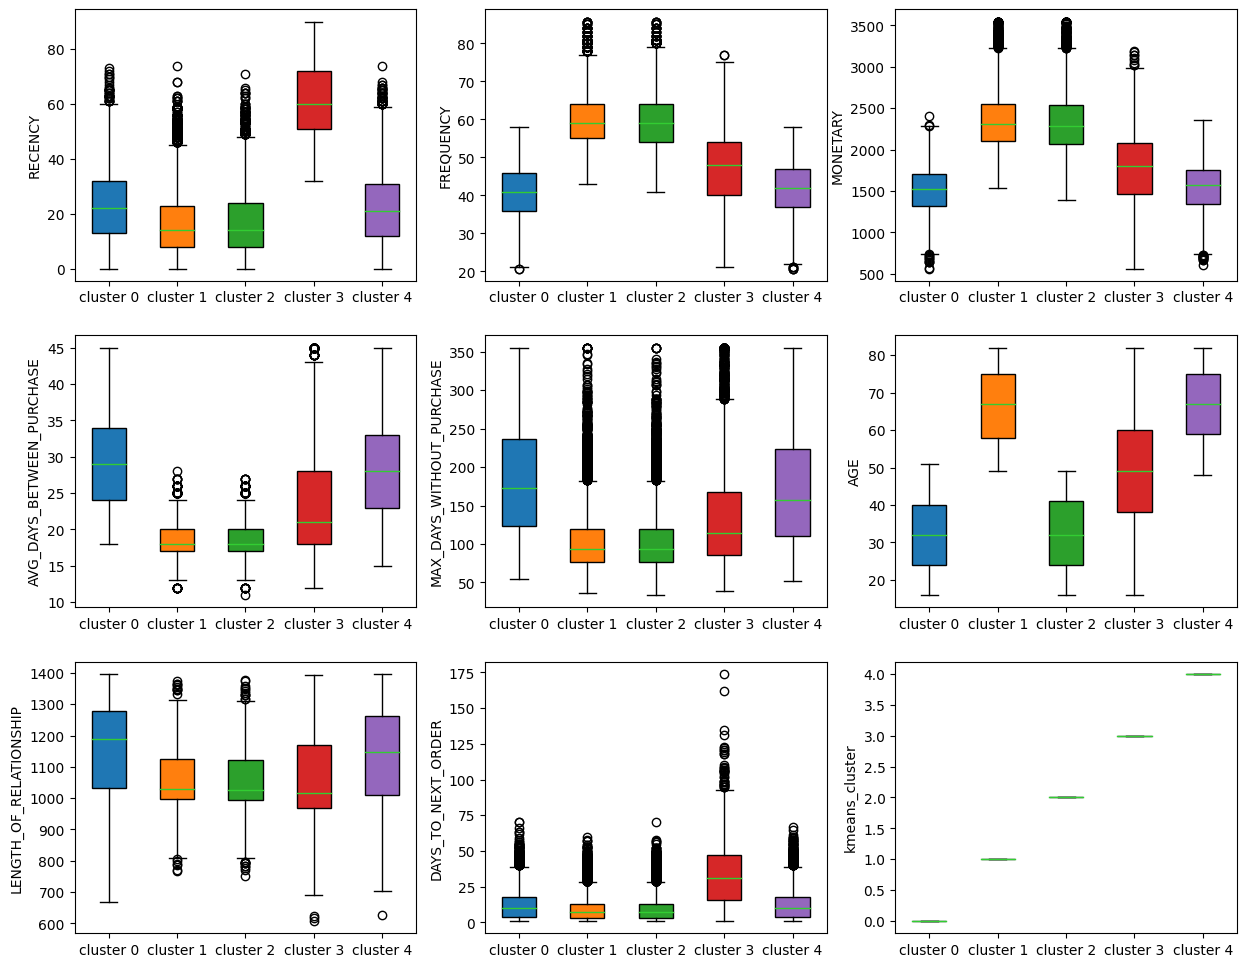

In [ ]:
variable_boxplot('kmeans_cluster', custom_palette_k_means,cust_seg_before_scaling_num)

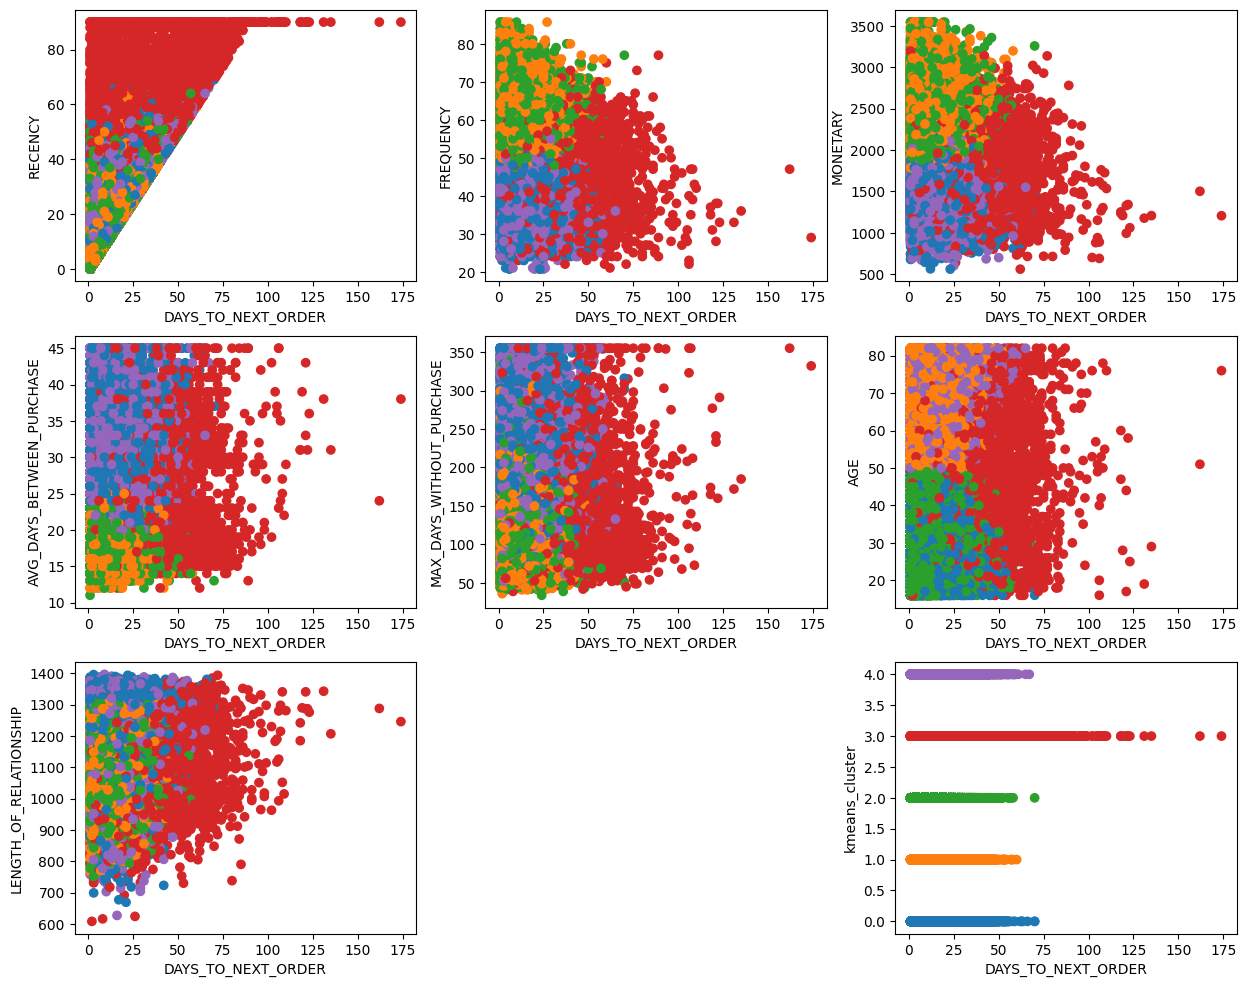

In [ ]:
variable_scatterplot('kmeans_cluster','DAYS_TO_NEXT_ORDER',custom_palette_k_means,cust_seg_before_scaling_num)

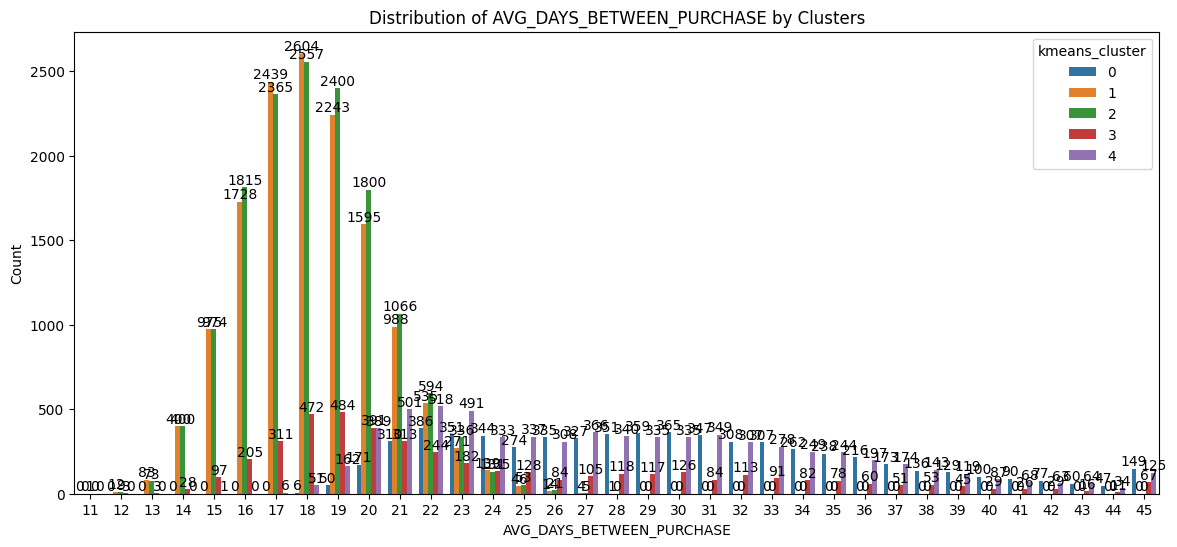

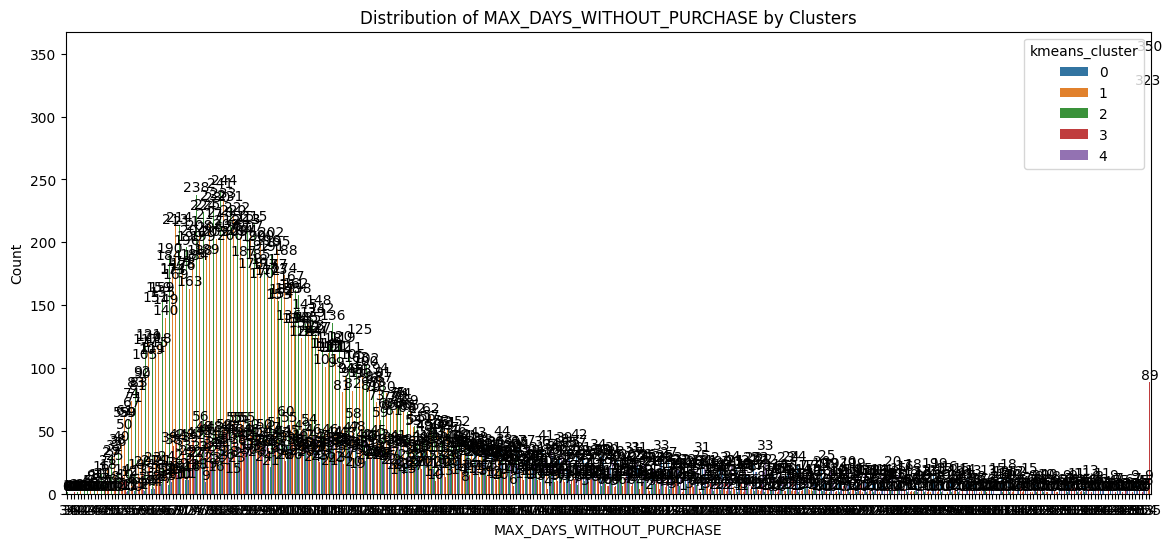

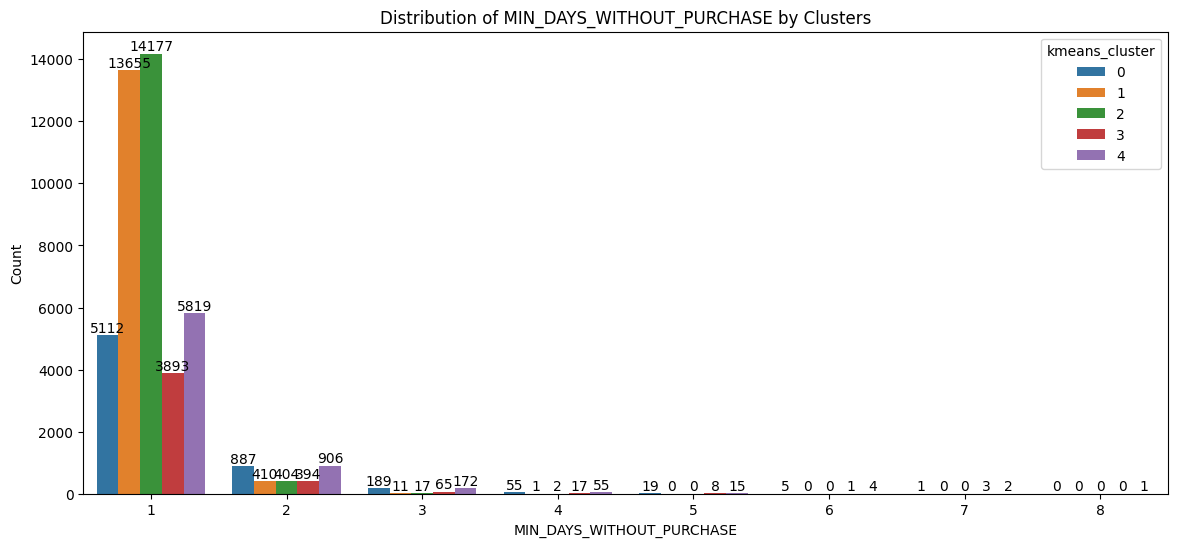

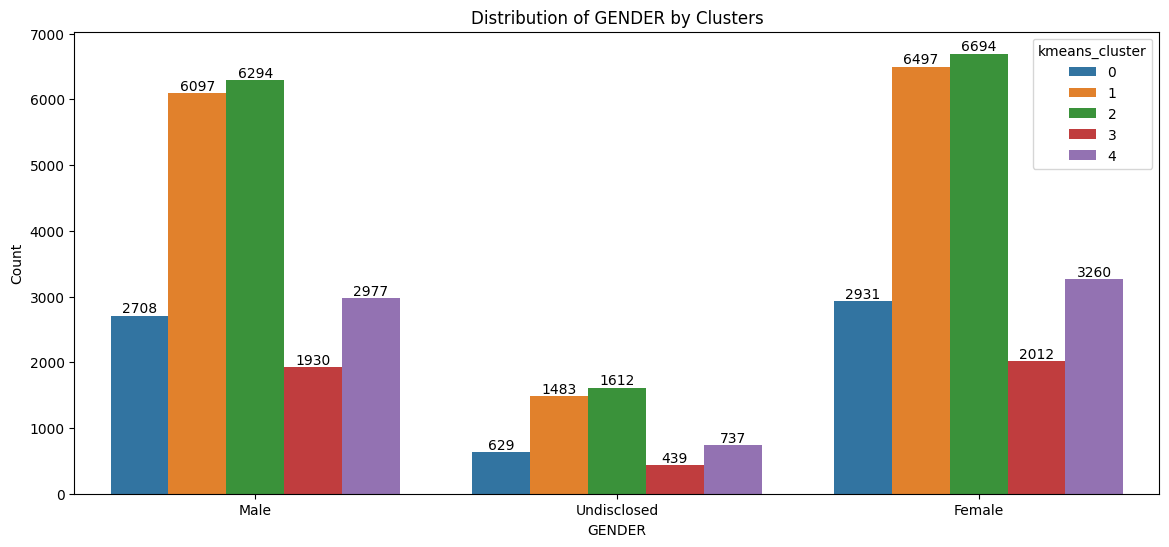

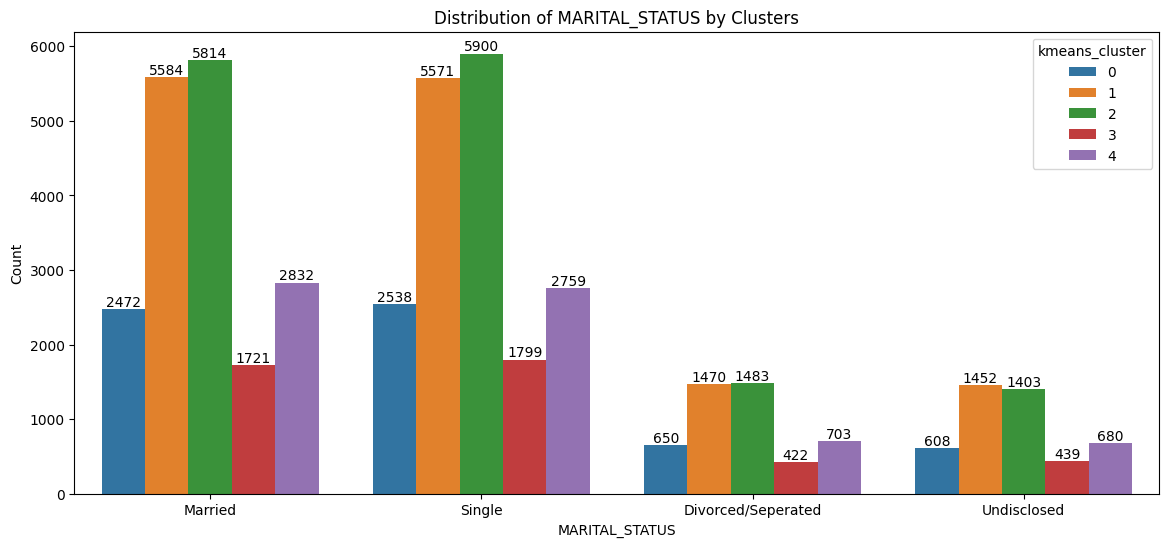

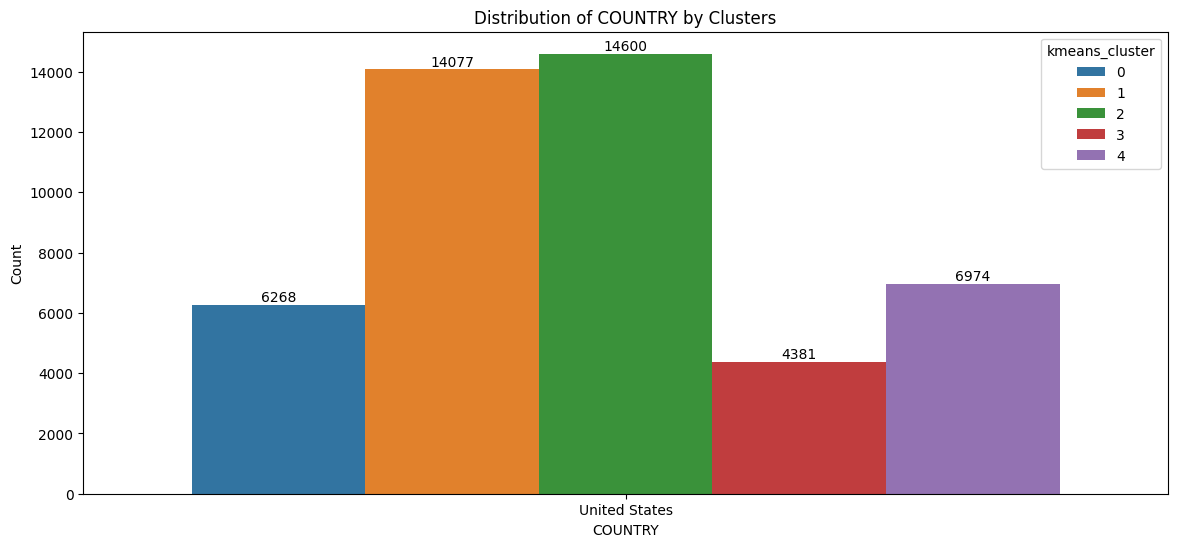

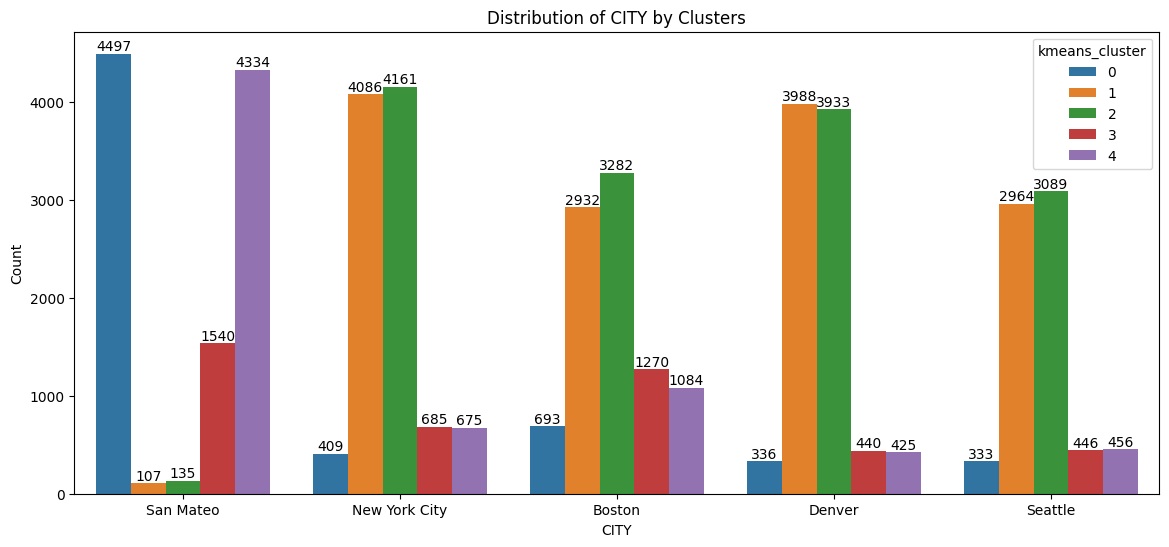

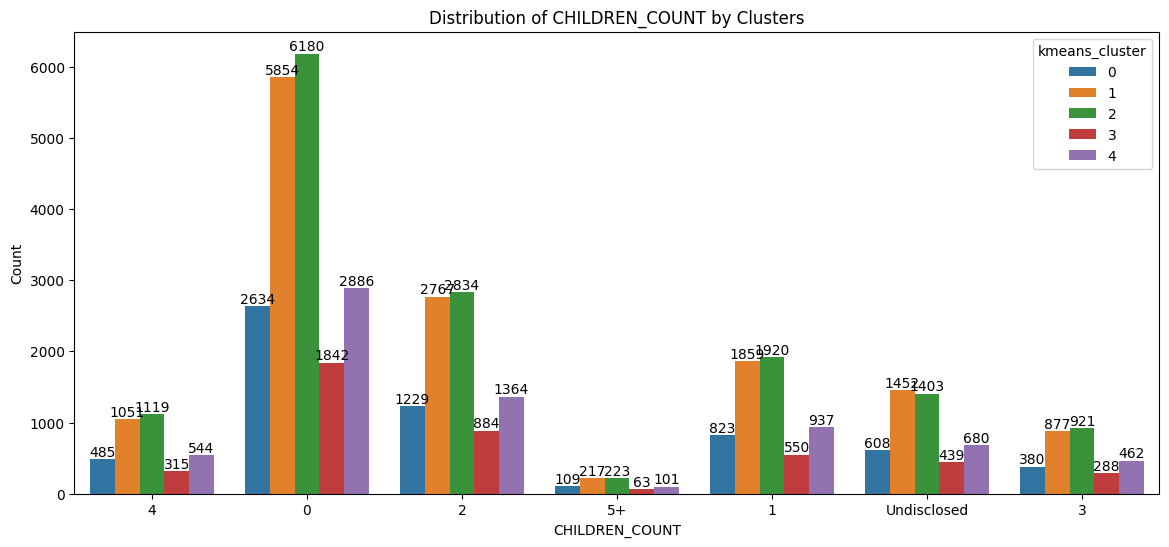

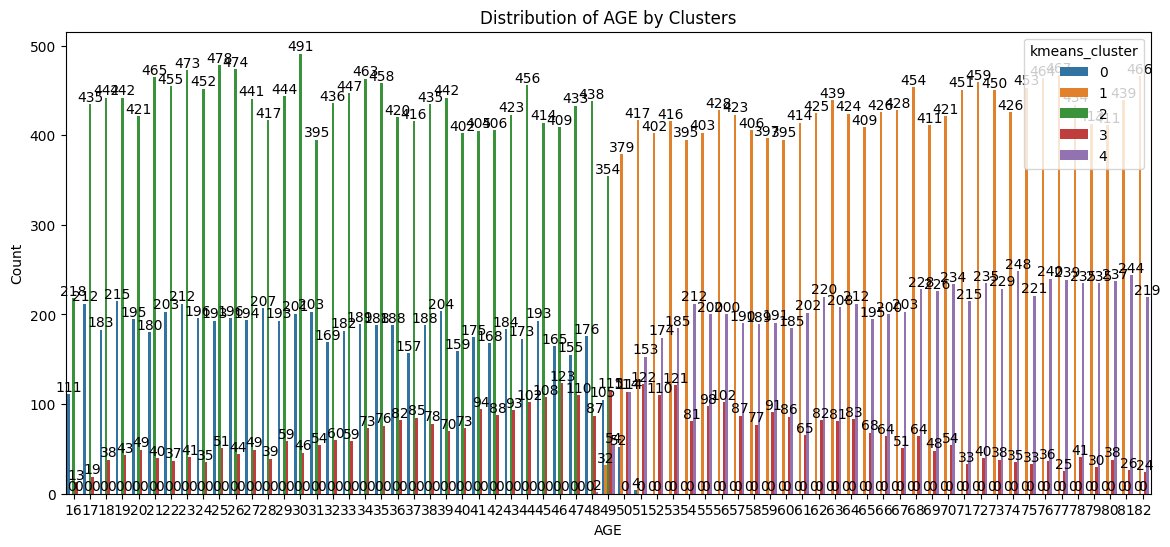

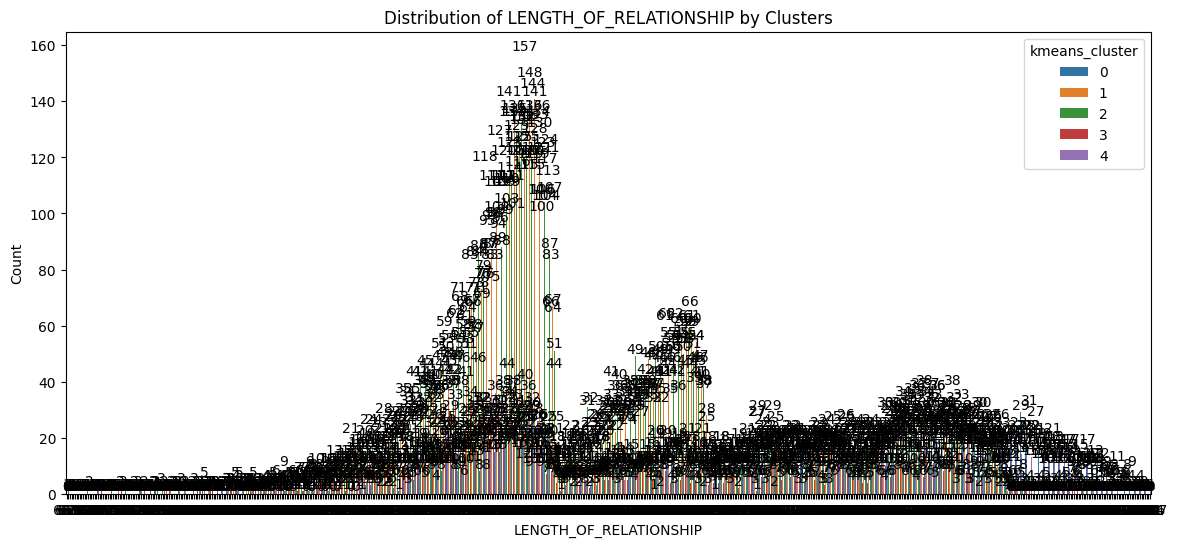

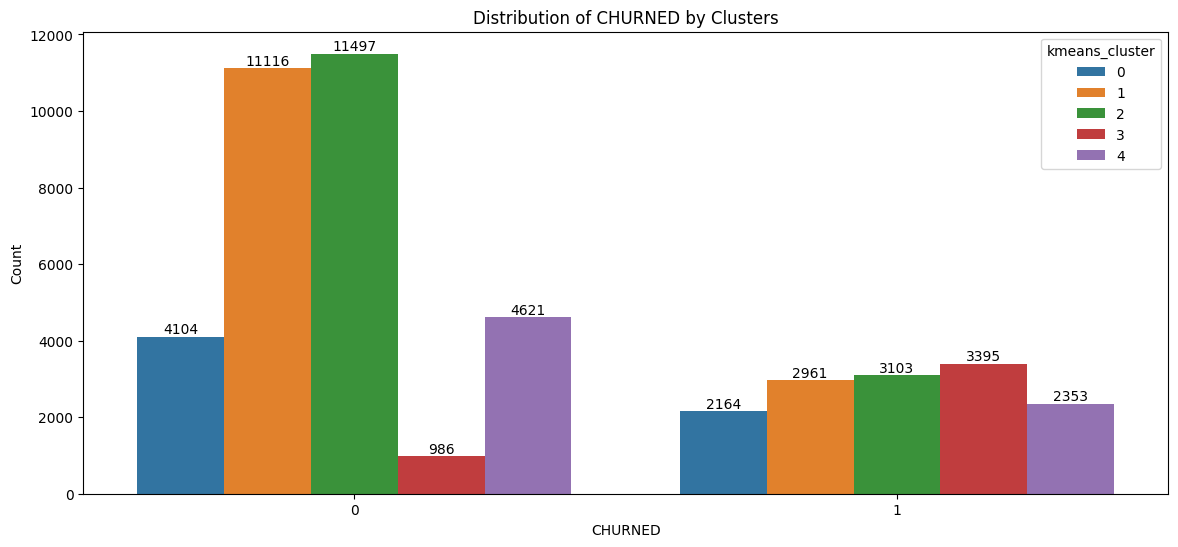

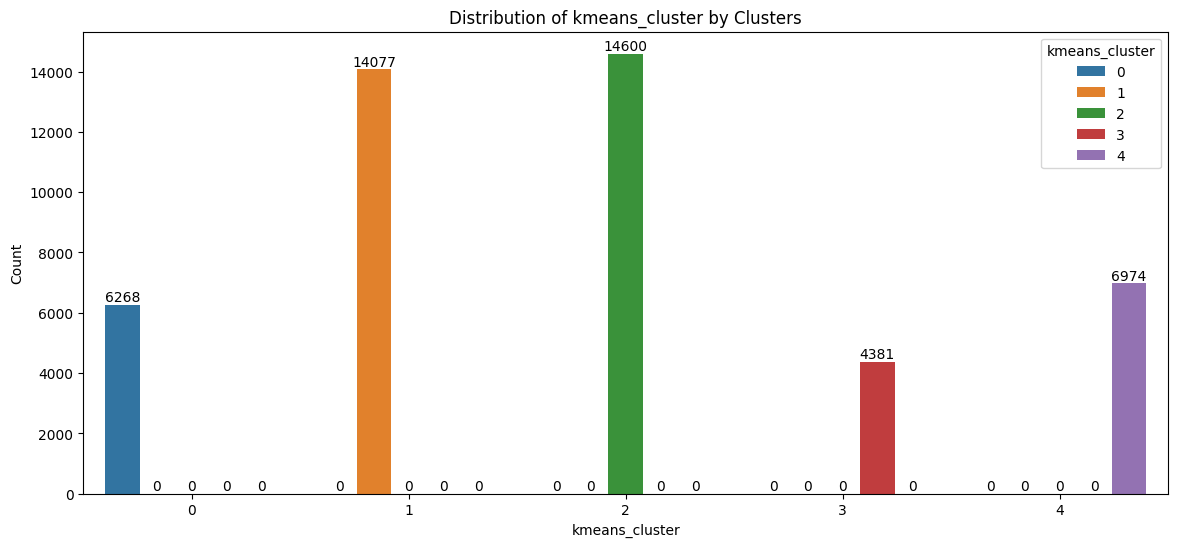

In [ ]:
for categorical_var in cust_seg_before_scaling_cat.columns:
    plot_categorical_distribution(categorical_var, "kmeans_cluster", custom_palette_k_means,cust_seg_before_scaling_cat)

In [ ]:
cust_seg_before_scaling_cat.groupby('kmeans_cluster')['CHURNED'].value_counts()

kmeans_cluster  CHURNED
0               0           4104
                1           2164
1               0          11116
                1           2961
2               0          11497
                1           3103
3               1           3395
                0            986
4               0           4621
                1           2353
Name: CHURNED, dtype: int64

In [ ]:
cust_seg_before_scaling_cat.groupby('kmeans_cluster')['CHURNED'].mean() * 100

kmeans_cluster
0    34.524569
1    21.034311
2    21.253425
3    77.493723
4    33.739604
Name: CHURNED, dtype: float64

|          Cluster          |          0         |                   1                  |          2         |                   3                  |        4        |
|:-------------------------:|:------------------:|:------------------------------------:|:------------------:|:------------------------------------:|:---------------:|
| RECENCY                   | Low-Med            | Low                                  | Low-Med            | Low                                  | High            |
| FREQUENCY                 | Low                | High                                 | Low                | High                                 | High-Med        |
| MONETARY                  | Low                | High                                 | Low                | High                                 | High-Med        |
| AVG_DAYS_BETWEEN_PURCHASE | High               | Low                                  | High               | Low                                  | Med             |
| MAX_DAYS_WITHOUT_PURCHASE | Med                | Low                                  | Med                | Low                                  | Low             |
| AGE                       | Low                | High                                 | High               | Low                                  | Med             |
| LENGTH_OF_RELATIONSHIP    | High               | Med                                  | High               | Med                                  | Low-Med         |
| DAYS_TO_NEXT_ORDER        | Med                | Low                                  | Low-Med            | Low                                  | High            |
| MIN_DAYS_WITHOUT_PURCHASE | Mostly 1,high 2,3  | Majority 1                           | Mostly 1,high 2,3  | Majority 1                           | Majority 1      |
| GENDER                    | Equal              | Equal                                | Equal              | Equal                                | Equal           |
| MARITAL_STATUS            | Equal              | Equal                                | Equal              | Equal                                | Equal           |
| CITY                      | Majority San Mateo | Equal in all cities except San Mateo | Majority San Mateo | Equal in all cities except San Mateo | Relatively even |
| CHILDREN_COUNT            | Equal              | Equal                                | Equal              | Equal                                | Equal           |
| CHURN                     | 40% churned        | 40% churned                          | 40% churned        | 20% churned                          | 70% churned     |
| TOTAL                     | 5152               | 15799                                | 5075               | 15616                                | 4658            |
| TOTAL PERCENT             | 11.13%             | 34.12%                               | 10.96%             | 33.73%                               | 10.06%          |

Cluster 0 - "Low-Value Engaged Customers":
In this cluster, customers exhibit low recency, frequency, and monetary values, indicating they are less active and spend less. They are generally younger and predominantly from San Mateo. Churn rate is around 40%, which is relatively high. These customers have the highest average days between purchases and median days without purchase. They seem to be infrequent buyers with longer intervals between purchasesThe cluster represents 11.13% of the total data.

Cluster 1 - "High-Value Loyal Customers":
This cluster represents the highest number of customers (34.12%) and consists of engaged, high-value customers. They show high recency, frequency, and monetary values, indicating they are loyal, active buyers who spend significantly more. The churn rate is 40%, suggesting that even though they are valuable, there is still a risk of losing some of them. The customers in this cluster have the highest age and are evenly distributed across cities.

Cluster 2 - "Moderate-Value Active Customers":
Customers in this cluster exhibit moderate recency, frequency, and monetary values. They are a mix of active and engaged customers with a churn rate of 40%. They predominantly reside in San Mateo. These customers have higher average days between purchases and median days without a purchase, suggesting moderate activity levels.

Cluster 3 - "Low-Value Occasional Buyers":
This cluster consists of customers with low recency, frequency, and monetary values, indicating they are occasional buyers with low spending. They tend to be younger and exhibit a churn rate of 20%, which is relatively lower than other clusters. They have the lowest age and are more likely to be single. Additionally, the majority of them are from cities other than San Mateo, suggesting a more diverse geographic distribution.

Cluster 4 - "High-Value Churning Customers":
The smallest cluster (10.06%) includes high-value customers with a churn rate of 70%, making them the most at risk of churning. They display high recency, frequency, and monetary values, indicating their significant contribution to revenue. However, despite their value, they show a relatively high churn rate. The cluster comprises a mix of ages, marital status, and city distributions, reflecting their diversity in demographic characteristics.

Customer Type: Low-Value Engaged Customers
Customer Type Information:
In this customer type, individuals display low recency, frequency, and monetary values, indicating they are less active and spend less. They are generally younger and predominantly reside in San Mateo. The churn rate is around 40%, which is relatively high. These customers have the highest average days between purchases and median days without a purchase, suggesting they are infrequent buyers with longer intervals between purchases. This segment represents 11.13% of the total customer data.

Customer Type: High-Value Loyal Customers
Customer Type Information:
This customer type represents the highest number of customers at 34.12% of all customers and consists of engaged, high-value customers. They demonstrate high recency, frequency, and monetary values, indicating they are loyal, active buyers who spend significantly more. The churn rate is 40%, suggesting that despite their value, there is still a risk of losing some of them. The customers in this segment have the highest age and are evenly distributed across cities.

Customer Type: Moderate-Value Active Customers
Customer Type Information:
Customers in this customer type exhibit moderate recency, frequency, and monetary values. They are a mix of active and engaged customers with a churn rate of 40%. They predominantly reside in San Mateo. These customers have higher average days between purchases and median days without a purchase, suggesting moderate activity levels.

Customer Type: Low-Value Occasional Buyers
Customer Type Information:
This customer type consists of individuals with low recency, frequency, and monetary values, indicating they are occasional buyers with low spending. They tend to be younger and exhibit a churn rate of 20%, which is relatively lower than other customer types. They have the lowest age and are more likely to be single. Additionally, the majority of them are from cities other than San Mateo, suggesting a more diverse geographic distribution.

Customer Type: High-Value Churning Customers
Customer Type Information:
This is the smallest customer type, making up 10.06% of customers, and includes high-value customers with a churn rate of 70%, making them the most at risk of churning. They display high recency, frequency, and monetary values, indicating their significant contribution to revenue. However, despite their value, they show a relatively high churn rate. The customer type comprises a mix of ages, marital status, and city distributions, reflecting their diversity in demographic characteristics.

# 5. Model Building

## 5.1 Define Evaluation Function

In [ ]:
# Function to show MSE, MAE, r-sq of Classification models
def evaluateModel(model):

    print('Train Accuracy: \t{:.2f}%  \
          \nTest Accuracy: \t\t{:.2f}%  \
          \nHoldout Accuracy: \t{:.2f}%'.format(model.score(X_train, y_train)*100,model.score(X_test, y_test)*100,model.score(X_holdout, y_holdout)*100))

In [ ]:
# Function to show MSE, MAE, r-sq of Classification models
def evaluateModelWithName(model,model_name):
    
    print(model_name)
    print('Train Accuracy: \t{:.2f}%  \
          \nTest Accuracy: \t\t{:.2f}%  \
          \nHoldout Accuracy: \t{:.2f}%'.format(model.score(X_train, y_train)*100,model.score(X_test, y_test)*100,model.score(X_holdout, y_holdout)*100))

In [ ]:
# stop

## 5.2 Logistic Regression

Logistic regression is a statistical method used for binary classification problems, such as problems where the response variable will be binary. Logistic regression models the relationship between the dependent variable and one or more independent variables by fitting a logistic function. It's used to predict a binary outcome based on one or more input variables, in this case, predicting if the customer will churn or not

 - is a statistical method used for predicting binary outcomes, in this case, whether a customer will churn or not
 - acts as our baseline model for this assignment

### 5.2.1 Build the model

In [ ]:
# Build Logistic Regression Model
log_ref_before = LogisticRegression(max_iter=10000)
log_ref_before.fit(X_train, y_train)

evaluateModel(log_ref_before)

Train Accuracy: 	81.42%            
Test Accuracy: 		80.92%            
Holdout Accuracy: 	80.29%


### 5.2.2 Improve the model

In [ ]:
# Use GridSearch to find the best combination of model hyperparameters

logreg = LogisticRegression()
param_grid = {"penalty": ["l2"],
                "C" : [0.1, 1, 10],
                "solver" : ["newton-cg", "lbfgs", "liblinear"]}

gs =GridSearchCV(logreg, param_grid = param_grid, scoring = "accuracy", cv = 10, n_jobs = -1)
gs = gs.fit(X_train, y_train)

lr_best_score=gs.best_score_
print(gs.best_score_)
print(gs.best_params_)

0.8177101967799641
{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
# Build Logistic Regression Model
log_ref_improved = LogisticRegression(**gs.best_params_)
log_ref_improved.fit(X_train, y_train)

evaluateModel(log_ref_improved)

Train Accuracy: 	81.95%            
Test Accuracy: 		81.58%            
Holdout Accuracy: 	80.94%


## 5.3 Decision Tree

A decision tree classifier is a machine learning algorithm that creates a predictive model in the form of a tree-like structure. The model makes decisions based on a sequence of hierarchical if-else conditions applied to input features. Each internal node of the tree represents a decision based on a feature, while the leaf nodes represent the predicted outcome or class label. 

 - base model: overfitting as train accuracy is much higher than test accuracy
 - after gridsearch: reduces overfitting

### 5.3.1 Build the model

In [ ]:
# Build Decision Tree Model
decision_tree_before = tree.DecisionTreeClassifier(max_depth = 20)

decision_tree_before.fit(X_train, y_train)

evaluateModel(decision_tree_before)

Train Accuracy: 	98.69%            
Test Accuracy: 		75.60%            
Holdout Accuracy: 	75.45%


### 5.3.2 Improve the model

In [ ]:
dt = tree.DecisionTreeClassifier()

param_grid = { "criterion" : ["gini", "entropy"], 
              "min_samples_leaf" : [1, 5, 10,20,30,40,50,100], 
              "min_samples_split" : [2, 4, 10, 12, 16], 
              'max_depth' : [2,3,4,5,6,7]}

gs = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy', cv= 5, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train, y_train) 
dt_best_score=gs.best_score_

print(gs.best_score_)
print(gs.best_params_)

0.8207513416815742
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 2}


In [ ]:
# Create Decision Tree using the best hyperparameters
decision_tree_improved = tree.DecisionTreeClassifier(**gs.best_params_)
decision_tree_improved.fit(X_train, y_train)

evaluateModel(decision_tree_improved)

Train Accuracy: 	82.14%            
Test Accuracy: 		81.24%            
Holdout Accuracy: 	81.60%


## 5.4 Random Forest

A random forest classifier is an ensemble learning algorithm that combines multiple decision trees to make predictions. It operates by constructing a multitude of decision trees during training and then aggregating their predictions to determine the final outcome. Each tree in the random forest is trained on a random subset of the training data, and the final prediction is made based on a majority vote or average of the individual tree predictions. This approach improves the model's accuracy, reduces overfitting, and allows for handling high-dimensional data. 

- base model: overfitting as train accuracy is much higher than test accuracy
- inconsistent accuracy
- after grid-search: reduces overfitting

### 5.4.1 Build the model

In [ ]:
# Build Random Forest Model
random_forest_before= RandomForestClassifier(n_estimators=100)
random_forest_before.fit(X_train, y_train)

evaluateModel(random_forest_before)

Train Accuracy: 	100.00%            
Test Accuracy: 		81.33%            
Holdout Accuracy: 	81.56%


### 5.4.2 Improve the model

In [ ]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [10, 50, 100],
'max_depth': [ 4, 6, 8],
'min_samples_split': [5, 10, 15]}

gs = GridSearchCV(rf, param_grid = param_grid, scoring = "accuracy", cv = 5, n_jobs = -1)
gs = gs.fit(X_train, y_train)

rf_best_score=gs.best_score_
print(gs.best_score_)
print(gs.best_params_)

0.8203041144901609
{'max_depth': 6, 'min_samples_split': 10, 'n_estimators': 50}


In [ ]:
# Build RandomForest Model and Evaluate both training and testing accuracy
random_forest_improved = RandomForestClassifier(**gs.best_params_)
random_forest_improved.fit(X_train,y_train)

evaluateModel(random_forest_improved)

Train Accuracy: 	82.62%            
Test Accuracy: 		81.47%            
Holdout Accuracy: 	81.61%


## 5.5 Adaboost

The AdaBoost classifier is a machine learning algorithm that combines weak learners, typically decision trees, into a strong predictive model. It works by iteratively training weak classifiers on different subsets of the training data and assigning higher weights to the misclassified samples in each iteration. This iterative process focuses on difficult instances, making subsequent weak learners prioritize them. The final prediction is determined by aggregating the weighted predictions of all the weak learners.
- base model: overfitting as train accuracy is much higher than test accuracy
- after grid-search: reduces overfitting


### 5.5.1 Build the model

In [ ]:
# Build Ada Boost Model
adb_before = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5,learning_rate=1)
adb_before.fit(X_train, y_train)

evaluateModel(adb_before)

Train Accuracy: 	100.00%            
Test Accuracy: 		75.67%            
Holdout Accuracy: 	75.28%


### 5.5.2 Improve the model

In [ ]:
adb = AdaBoostClassifier()

param_grid = {
    'estimator': [tree.DecisionTreeClassifier(max_depth=1), tree.DecisionTreeClassifier(max_depth=2)],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

gs = GridSearchCV(adb, param_grid, cv=5, n_jobs=-1)

gs.fit(X_train, y_train)

adb_best_score=gs.best_score_
print(gs.best_score_)
print(gs.best_params_)

0.833989266547406
{'algorithm': 'SAMME.R', 'estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.5, 'n_estimators': 100}


In [ ]:
# Build Ada Boost Model and Evaluate both training and testing accuracy
adb_improved = AdaBoostClassifier(**gs.best_params_)
adb_improved.fit(X_train,y_train)

evaluateModel(adb_improved)

Train Accuracy: 	85.63%            
Test Accuracy: 		82.98%            
Holdout Accuracy: 	82.78%


## 5.6 XGboost (Final Model)

XGBoost, also known as Extreme Gradient Boosting, is a popular machine learning algorithm used for classification problems. It is an implementation of the gradient boosting framework, which can handle missing values, extreme values and large number of classes. XGBoost uses a decision tree as its base model and combines multiple decision trees to form an ensemble model. This results in improved accuracy compared to a single decision tree model.  Furthermore, the algorithm allows for fine-tuning of hyperparameters to optimize performance and makes use of a variety of optimization techniques, such as regularization, to reduce overfitting which is the reason why it often outperforms traditional models such as logistic regression and decision trees due to its ability to handle large datasets, handle missing values, and perform well on imbalanced datasets. 

- best model amongst all 5 
- base model: overfitting as train accuracy is much higher than test accuracy
- after grid-search: reduces overfitting

### 5.6.1 Build the model

In [ ]:
# Build XGBoost Model
xgb_before = XGBClassifier(n_estimators = 20, learning_rate = 0.1, eval_metric='logloss',max_depth = 20)
xgb_before.fit(X_train, y_train)

#E valuate XGBoost Model
evaluateModel(xgb_before)

Train Accuracy: 	98.64%            
Test Accuracy: 		80.11%            
Holdout Accuracy: 	80.24%


In [ ]:
## With City and Children COunt + std_days_between_purchase
# Train Accuracy: 	96.44%            
# Test Accuracy: 		75.28%            
# Holdout Accuracy: 	75.36%

In [ ]:
## With City and Children COunt + diff in days
#Train Accuracy: 	98.27%            
#Test Accuracy: 		75.85%            
#Holdout Accuracy: 	75.78%

In [ ]:
## With city and children count + Last month number of orders
# Train Accuracy: 	97.44%            
# Test Accuracy: 		74.15%            
# Holdout Accuracy: 	73.11%

In [ ]:
## With city and children count - Current best
# Train Accuracy: 	96.48%            
# Test Accuracy: 		75.20%            
# Holdout Accuracy: 	75.38%

In [ ]:
## Normal
# Train Accuracy: 	95.18%            
# Test Accuracy: 		75.07%            
# Holdout Accuracy: 	75.31%

### 5.6.2 Improve the model

In [ ]:
xgb = XGBClassifier()

param_grid = {
    'max_depth': [4, 6, 8], 
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [20, 50, 100],
    'subsample':[0.6,0.7,0.8]
}

gs = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1,scoring='accuracy')

gs.fit(X_train, y_train)

xgb_best_score=gs.best_score_
print(gs.best_score_)
print(gs.best_params_)

0.8313059033989267
{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}


In [ ]:
# Build XGBoost Model and Evaluate both training and testing accuracy 
xgb_improved = XGBClassifier(**gs.best_params_)
xgb_improved.fit(X_train,y_train)

evaluateModel(xgb_improved)

Train Accuracy: 	86.79%            
Test Accuracy: 		83.19%            
Holdout Accuracy: 	82.91%


In [ ]:
#import joblib
#joblib.dump(xgb_improved, 'StreamlitApp/assets/churn-prediction-model.jbl')

In [ ]:
## With City and Children count + *(RELATIVE_PURCHASE_FREQUENCY and RELATIVE_PURCHASE_MONETARY)
##+Number of locations visited -- Best with 14 days churn
# Train Accuracy: 	86.79%            
# Test Accuracy: 		83.19%            
# Holdout Accuracy: 	82.91%

In [ ]:
## With City and Children count + *(RELATIVE_PURCHASE_FREQUENCY and RELATIVE_PURCHASE_MONETARY)
##+Number of locations visited -- Best with 9 days churn
# Train Accuracy: 	82.78%            
# Test Accuracy: 		79.05%            
# Holdout Accuracy: 	78.96%

In [ ]:
## With City and Children count + *(RELATIVE_PURCHASE_FREQUENCY and RELATIVE_PURCHASE_MONETARY)
##+Number of locations visited +Number of trucks visited
# Train Accuracy: 	82.99%            
# Test Accuracy: 		78.90%            
# Holdout Accuracy: 	78.84%

In [ ]:
## With City and Children count + *(RELATIVE_PURCHASE_FREQUENCY and RELATIVE_PURCHASE_MONETARY) 
##+Number of trucks visited
# Train Accuracy: 	82.90%            
# Test Accuracy: 		78.99%            
# Holdout Accuracy: 	78.69%

In [ ]:
## With City and Children count + *(RELATIVE_PURCHASE_FREQUENCY and RELATIVE_PURCHASE_MONETARY)
# Train Accuracy: 	82.95%            
# Test Accuracy: 		78.96%            
# Holdout Accuracy: 	78.49%

In [ ]:
## With City and Children COunt + std_days_between_purchase
# Train Accuracy: 	78.40%            
# Test Accuracy: 		77.42%            
# Holdout Accuracy: 	77.46%

In [ ]:
## With City and Children COunt + average number of orders per month and number of orders in month
# Train Accuracy: 	97.42%            
# Test Accuracy: 		74.57%            
# Holdout Accuracy: 	73.90%

In [ ]:
## With City and Children COunt + Tenure
# Train Accuracy: 	78.36%            
# Test Accuracy: 		77.46%            
# Holdout Accuracy: 	77.54%

In [ ]:
## With City and Children COunt +last 30 days orders
# Train Accuracy: 	77.09%            
# Test Accuracy: 		77.17%            
# Holdout Accuracy: 	76.71%

In [ ]:
## With City and Children COunt + diff in days
# Train Accuracy: 	81.41%            
# Test Accuracy: 		77.74%            
# Holdout Accuracy: 	77.83%

In [ ]:
## With City and Children count + Freq Truck_id +Rare encoding
# Train Accuracy: 	78.50%            
# Test Accuracy: 		77.62%            
# Holdout Accuracy: 	77.61%

In [ ]:
## With City and Children count + last truck id
# Train Accuracy: 	78.60%            
# Test Accuracy: 		77.64%            
# Holdout Accuracy: 	77.49%

In [ ]:
## With City and Children count 
# Train Accuracy: 	78.53%            
# Test Accuracy: 		77.60%            
# Holdout Accuracy: 	77.53%

In [ ]:
## Normal
# Train Accuracy: 	78.43%            
# Test Accuracy: 		77.26%            
# Holdout Accuracy: 	77.26%

In [ ]:
pd.DataFrame(X_train.columns, xgb_improved.feature_importances_)

,0
0.460990,RECENCY
0.019210,FREQUENCY
0.021119,MONETARY
0.036143,AVG_DAYS_BETWEEN_PURCHASE
0.018247,MAX_DAYS_WITHOUT_PURCHASE
0.017237,MIN_DAYS_WITHOUT_PURCHASE
0.019718,AGE
0.030851,LENGTH_OF_RELATIONSHIP
0.018154,NUM_OF_LOCATIONS_VISITED
0.045036,RELATIVE_PURCHASE_FREQUENCY


# 6. Model Comparison

## 6.1 Model Accuracies

In [ ]:
evaluateModelWithName(log_ref_before,'log_ref_before')
evaluateModelWithName(log_ref_improved,'log_ref_improved')
print('\n')

evaluateModelWithName(decision_tree_before,'decision_tree_before')
evaluateModelWithName(decision_tree_improved,'decision_tree_improved')
print('\n')

evaluateModelWithName(random_forest_before,'random_forest_before')
evaluateModelWithName(random_forest_improved,'rdm_fst_improved')
print('\n')

evaluateModelWithName(adb_before,'adb_before')
evaluateModelWithName(adb_improved,'adb_improved')
print('\n')

evaluateModelWithName(xgb_before,'xgb_before')
evaluateModelWithName(xgb_improved,'xgb_improved')

log_ref_before
Train Accuracy: 	81.42%            
Test Accuracy: 		80.92%            
Holdout Accuracy: 	80.29%
log_ref_improved
Train Accuracy: 	81.95%            
Test Accuracy: 		81.58%            
Holdout Accuracy: 	80.94%


decision_tree_before
Train Accuracy: 	98.69%            
Test Accuracy: 		75.60%            
Holdout Accuracy: 	75.45%
decision_tree_improved
Train Accuracy: 	82.14%            
Test Accuracy: 		81.24%            
Holdout Accuracy: 	81.60%


random_forest_before


Train Accuracy: 	100.00%            
Test Accuracy: 		81.33%            
Holdout Accuracy: 	81.56%
rdm_fst_improved
Train Accuracy: 	82.62%            
Test Accuracy: 		81.47%            
Holdout Accuracy: 	81.61%


adb_before
Train Accuracy: 	100.00%            
Test Accuracy: 		75.67%            
Holdout Accuracy: 	75.28%
adb_improved
Train Accuracy: 	85.63%            
Test Accuracy: 		82.98%            
Holdout Accuracy: 	82.78%


xgb_before
Train Accuracy: 	98.64%            
Test Accuracy: 		80.11%            
Holdout Accuracy: 	80.24%
xgb_improved
Train Accuracy: 	86.79%            
Test Accuracy: 		83.19%            
Holdout Accuracy: 	82.91%


In [ ]:
#View Cross Validation Score
print('Logistic Regression Cross Validation Accuracy: {:.2f}%'.format(lr_best_score*100))
print('Decision Tree Cross Validation Accuracy: {:.2f}%'.format(dt_best_score*100))
print('Random Forest Cross Validation Accuracy: {:.2f}%'.format(rf_best_score*100))
print('Ada Boost Cross Validation Accuracy: {:.2f}%'.format(adb_best_score*100))
print('XGBoost Cross Validation Accuracy: {:.2f}%'.format(xgb_best_score*100))

Logistic Regression Cross Validation Accuracy: 81.77%
Decision Tree Cross Validation Accuracy: 82.08%
Random Forest Cross Validation Accuracy: 82.03%
Ada Boost Cross Validation Accuracy: 83.40%
XGBoost Cross Validation Accuracy: 83.13%


In [ ]:
stop

The chosen model will be XGBoost as has the highest accuracy with the lowest overfit. While random forest on occasion (Keeps giving different hyper parameters during Grid Search) may have higher accuracies and lower overfit, it is seen that XGBoost is far more consistent and reproducible. For this reason, XGBoost will be chosen over the other models despite sometimes getting worse results. 

In [7]:
temp=pd.read_csv('assets/marketing.csv')

In [19]:
temp[['RECENCY','FREQUENCY','MONETARY','AVG_DAYS_BETWEEN_PURCHASE', 'MAX_DAYS_WITHOUT_PURCHASE',
       'MIN_DAYS_WITHOUT_PURCHASE', 'GENDER', 'MARITAL_STATUS', 'CITY',
       'CHILDREN_COUNT', 'AGE', 'LENGTH_OF_RELATIONSHIP',
       'NUM_OF_LOCATIONS_VISITED' ]]

,RECENCY,FREQUENCY,MONETARY,AVG_DAYS_BETWEEN_PURCHASE,MAX_DAYS_WITHOUT_PURCHASE,MIN_DAYS_WITHOUT_PURCHASE,GENDER,MARITAL_STATUS,CITY,CHILDREN_COUNT,AGE,LENGTH_OF_RELATIONSHIP,NUM_OF_LOCATIONS_VISITED
0,13,44,1439.00,29,173,1,Male,Married,San Mateo,4,73,1253,41
1,6,40,1817.50,33,167,1,Undisclosed,Single,San Mateo,0,56,1270,37
2,6,39,1325.50,33,390,1,Male,Married,San Mateo,2,61,1260,36
3,19,43,1407.25,29,207,2,Male,Divorced/Seperated,San Mateo,5+,64,1222,41
4,3,49,2147.75,24,158,1,Female,Single,San Mateo,0,55,1133,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46295,9,67,2609.50,16,54,1,Female,Married,Seattle,2,78,1028,61
46296,1,58,2284.50,18,107,1,Female,Married,New York City,1,64,1034,55
46297,3,37,1335.75,25,125,1,Undisclosed,Single,Boston,0,78,903,35
46298,14,37,1294.50,31,182,1,Female,Married,San Mateo,2,50,1102,36


In [26]:
X =train[['RECENCY','FREQUENCY','AVG_DAYS_BETWEEN_PURCHASE', 'MAX_DAYS_WITHOUT_PURCHASE',
       'MIN_DAYS_WITHOUT_PURCHASE', 'GENDER', 'MARITAL_STATUS', 'CITY',
       'CHILDREN_COUNT', 'AGE', 'LENGTH_OF_RELATIONSHIP',
       'NUM_OF_LOCATIONS_VISITED' ]]
y = train["MONETARY"]


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.6,random_state=42)
# Test and holdout split
X_test,X_holdout,y_test,y_holdout=train_test_split(X_test,y_test,test_size=0.5,random_state=42)

In [27]:
# One Hot Encoding 
ohe_enc = OneHotEncoder(
     top_categories=None,
     drop_last=True,
     variables=['GENDER','MARITAL_STATUS','CITY','CHILDREN_COUNT']) 

ohe_enc.fit(X_train)
X_train = ohe_enc.transform(X_train)
X_test=ohe_enc.transform(X_test)
X_holdout=ohe_enc.transform(X_holdout)

In [28]:
# Min Max Scaler

cols_to_scale=X_train.drop('CHURNED',axis=1, errors='ignore').columns

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train[cols_to_scale])

# transform train and test sets
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test[cols_to_scale]= scaler.transform(X_test[cols_to_scale])
X_holdout[cols_to_scale]=scaler.transform(X_holdout[cols_to_scale])

In [34]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [37]:
def evaluateRegressionModelPerformance(model, X_train, X_test, X_holdout, y_train, y_test, y_holdout):
    # Training evaluation
    print('Training Set:')
    train_pred=xgb_improved.predict(X_train)
    print('Mean Squared Error:', mean_squared_error(train_pred, y_train))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(train_pred, y_train)))
    print('R-squared:', r2_score(y_train, train_pred))
    print()

    # Testing evaluation
    print('Testing Set:')
    test_pred=xgb_improved.predict(X_test)
    print('Mean Squared Error:', mean_squared_error(test_pred, y_test))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(test_pred, y_test)))
    print('R-squared:', r2_score(y_test, test_pred))
    print()

    # Holdout evaluation
    print('Holdout Set:')
    holdout_pred=xgb_improved.predict(X_holdout)
    print('Mean Squared Error:', mean_squared_error(holdout_pred, y_holdout))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(holdout_pred, y_holdout)))
    print('R-squared:', r2_score(y_holdout, holdout_pred))

In [38]:
# Build XGBoost Model
xgb_improved = XGBRegressor(learning_rate = 0.1, max_depth = 5, n_estimators = 50)
# fit the model to the training data
xgb_improved.fit(X_train, y_train)

evaluateRegressionModelPerformance(xgb_improved, X_train, X_test, X_holdout, y_train, y_test, y_holdout)

Training Set:
Mean Squared Error: 42236.120947128926
Root Mean Squared Error: 205.51428404645972
R-squared: 0.8293349343067167

Testing Set:
Mean Squared Error: 44114.892050358525
Root Mean Squared Error: 210.03545426988873
R-squared: 0.8209927532700136

Holdout Set:
Mean Squared Error: 45438.5723347921
Root Mean Squared Error: 213.16325277775272
R-squared: 0.8181700415989782
